# Temperature validation: 



In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import sys
import pandas as pd
import xarray as xr

from scipy import signal
from scipy import stats
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

In [2]:
sys.path.insert(1,'/home/disk/kalman2/mkb22/LMR_lite/')
import LMR_utils 

sys.path.insert(1,'/home/disk/p/mkb22/Documents/si_analysis_kb/instrumental_assimilation_experiments/')
import reanalysis_recons_utils as rrutils

Loading information from datasets.yml
Loading information from grid_def.yml
Loading information from datasets.yml
Loading information from grid_def.yml


In [3]:
sys.path.insert(1,'/home/disk/p/mkb22/Documents/si_analysis_kb/common_era_experiments/')
import commonera_utils as ce_utils 

In [4]:
def load_recon_allit(output_dir,filename,niter,prox_loc=True, tas=False):

    for it in range(niter):
        output_file = filename[:-5]+str(it)+'.pkl'

        if prox_loc is True: 
            if tas is True: 
                [sic_lalo, tas_lalo, sic_ens_var,nobs, sia_ens, sie_ens, recon_years, 
                 Ye_assim, Ye_assim_coords, Xb_inflate, proxy_assim_loc, 
                 cutoff_count_pos,cutoff_count_neg, gmtas_ens, 
                 nhmtas_ens, amtas_ens] = load_recon(output_dir+output_file, tas=True)
            else: 
                [sic_lalo, tas_lalo, sic_ens_var, 
                 nobs, sia_ens, sie_ens, recon_years, 
                 Ye_assim, Ye_assim_coords, Xb_inflate, proxy_assim_loc] = load_recon(output_dir+output_file)          
        else: 
            if tas is True: 
                [sic_lalo, tas_lalo, sic_ens_var,nobs, sia_ens, sie_ens, recon_years, 
                 Ye_assim, Ye_assim_coords, Xb_inflate, proxy_assim_loc, 
                 cutoff_count_pos,cutoff_count_neg, gmtas_ens, 
                 nhmtas_ens, amtas_ens] = load_recon(output_dir+output_file, prox_loc=False, tas=True)
            else: 
                [sic_lalo, tas_lalo, sic_ens_var, 
                 nobs, sia_ens, sie_ens, recon_years, 
                 Ye_assim, Ye_assim_coords, Xb_inflate] = load_recon(output_dir+output_file, prox_loc=False)

        if it is 0: 
            sic_lalo_allit = np.zeros((sic_lalo.shape[0],sic_lalo.shape[1],sic_lalo.shape[2],niter))
            tas_lalo_allit = np.zeros((tas_lalo.shape[0],tas_lalo.shape[1],tas_lalo.shape[2],niter))
            sic_ens_var_allit = np.zeros(niter)
            nobs_allit = np.zeros((nobs.shape[0],niter))
            sia_ens_allit = np.zeros((sia_ens.shape[0],sia_ens.shape[1],niter))
            sie_ens_allit = np.zeros((sie_ens.shape[0],sie_ens.shape[1],niter))
            Ye_assim_allit = np.zeros((Ye_assim.shape[0],Ye_assim.shape[1],niter))
            Ye_assim_coords_allit = np.zeros((Ye_assim_coords.shape[0],Ye_assim_coords.shape[1],niter))
            Xb_inflate_allit = np.zeros((Xb_inflate.shape[0],Xb_inflate.shape[1],niter))
            if prox_loc is True: 
                proxy_assim_loc_allit = {}
                
                if tas is True: 
                    cutoff_count_pos_allit = np.zeros(niter)
                    cutoff_count_neg_allit = np.zeros(niter)
                    gmtas_ens_allit = np.zeros((gmtas_ens.shape[0],gmtas_ens.shape[1],niter))
                    nhmtas_ens_allit = np.zeros((nhmtas_ens.shape[0],nhmtas_ens.shape[1],niter))
                    amtas_ens_allit = np.zeros((amtas_ens.shape[0],amtas_ens.shape[1],niter))
            else: 
                if tas is True: 
                    cutoff_count_pos_allit = np.zeros(niter)
                    cutoff_count_neg_allit = np.zeros(niter)
                    gmtas_ens_allit = np.zeros((gmtas_ens.shape[0],gmtas_ens.shape[1],niter))
                    nhmtas_ens_allit = np.zeros((nhmtas_ens.shape[0],nhmtas_ens.shape[1],niter))
                    amtas_ens_allit = np.zeros((amtas_ens.shape[0],amtas_ens.shape[1],niter))

        sic_lalo_allit[:,:,:,it] = sic_lalo
        tas_lalo_allit[:,:,:,it] = tas_lalo
        sic_ens_var_allit[it] = niter
        nobs_allit[:,it] = nobs
        sia_ens_allit[:,:,it] = sia_ens
        sie_ens_allit[:,:,it] = sie_ens
        Ye_assim_allit[:,:,it] = Ye_assim
        Ye_assim_coords_allit[:,:,it] = Ye_assim_coords
        Xb_inflate_allit[:,:,it] = Xb_inflate
        if prox_loc is True: 
            proxy_assim_loc_allit['iter '+str(it)] = proxy_assim_loc
            
            if tas is True: 
                cutoff_count_pos_allit[it] = cutoff_count_pos
                cutoff_count_neg_allit[it] = cutoff_count_neg
                gmtas_ens_allit[:,:,it] = gmtas_ens
                nhmtas_ens_allit[:,:,it] = nhmtas_ens
                amtas_ens_allit[:,:,it] = amtas_ens
        else: 
            if tas is True: 
                cutoff_count_pos_allit[it] = cutoff_count_pos
                cutoff_count_neg_allit[it] = cutoff_count_neg
                gmtas_ens_allit[:,:,it] = gmtas_ens
                nhmtas_ens_allit[:,:,it] = nhmtas_ens
                amtas_ens_allit[:,:,it] = amtas_ens
        
    if prox_loc is True:
        if tas is True: 
            return (sic_lalo_allit, tas_lalo_allit, sic_ens_var_allit, nobs_allit, 
                    sia_ens_allit, sie_ens_allit, Ye_assim_allit, Ye_assim_coords_allit, 
                    Xb_inflate_allit,recon_years, proxy_assim_loc_allit, cutoff_count_pos_allit, 
                    cutoff_count_neg_allit, gmtas_ens_allit, nhmtas_ens_allit, amtas_ens_allit)
        else: 
            return (sic_lalo_allit, tas_lalo_allit, sic_ens_var_allit, nobs_allit, 
                    sia_ens_allit, sie_ens_allit, Ye_assim_allit, Ye_assim_coords_allit, 
                    Xb_inflate_allit,recon_years, proxy_assim_loc_allit)
    else: 
        if tas is True: 
            return (sic_lalo_allit, tas_lalo_allit, sic_ens_var_allit, nobs_allit, 
                    sia_ens_allit, sie_ens_allit, Ye_assim_allit, Ye_assim_coords_allit, 
                    Xb_inflate_allit,recon_years, proxy_assim_loc_allit, cutoff_count_pos_allit, 
                    cutoff_count_neg_allit, gmtas_ens_allit, nhmtas_ens_allit, amtas_ens_allit)
        else: 
            return (sic_lalo_allit, tas_lalo_allit, sic_ens_var_allit, nobs_allit, 
                    sia_ens_allit, sie_ens_allit, Ye_assim_allit, Ye_assim_coords_allit, 
                    Xb_inflate_allit,recon_years)

In [5]:
def load_recon(LOC, prox_loc=True, tas=False):
    recon = pickle.load(open(LOC,'rb'))
    
    sic_lalo = recon['sic_lalo']
    tas_lalo = recon['tas_lalo']
    sic_ens_var = recon['sic_ens_var']
    nobs = recon['nobs']
    sia_ens = recon['sia_ens']
    sie_ens = recon['sie_ens']
    recon_years = recon['recon_years']
    Ye_assim = recon['Ye_assim']
    Ye_assim_coords = recon['Ye_assim_coords']
    Xb_inflate = recon['Xb_inflate'] 
    
    
    if prox_loc is True: 
        proxy_assim_loc = recon['proxy_assim_loc']
        
        if tas is True: 
            cutoff_count_pos = recon['cutoff_count_pos']
            cutoff_count_neg = recon['cutoff_count_neg']
            gmtas_ens = recon['gmtas_ens']
            nhmtas_ens = recon['nhmtas_ens']
            amtas_ens = recon['amtas_ens']
            
            return (sic_lalo, tas_lalo, sic_ens_var, nobs, sia_ens, sie_ens, recon_years, 
                    Ye_assim, Ye_assim_coords, Xb_inflate, proxy_assim_loc, cutoff_count_pos,
                    cutoff_count_neg, gmtas_ens, nhmtas_ens, amtas_ens)
            
        else: 
            return (sic_lalo, tas_lalo, sic_ens_var, nobs, sia_ens, sie_ens, recon_years, 
                    Ye_assim, Ye_assim_coords, Xb_inflate, proxy_assim_loc)
    else: 
        if tas is True: 
            cutoff_count_pos = recon['cutoff_count_pos']
            cutoff_count_neg = recon['cutoff_count_neg']
            gmtas_ens = recon['gmtas_ens']
            nhmtas_ens = recon['nhmtas_ens']
            amtas_ens = recon['amtas_ens']
            
            return (sic_lalo, tas_lalo, sic_ens_var, nobs, sia_ens, sie_ens, recon_years, 
                    Ye_assim, Ye_assim_coords, Xb_inflate, proxy_assim_loc, cutoff_count_pos,
                    cutoff_count_neg, gmtas_ens, nhmtas_ens, amtas_ens)
        else: 
            return (sic_lalo, tas_lalo, sic_ens_var, nobs, sia_ens, sie_ens, recon_years, 
                    Ye_assim, Ye_assim_coords, Xb_inflate)

In [6]:
def load_ccsm4_lm_regridded():
    ccsm4_dir = '/home/disk/chaos/mkb22/Documents/SeaIceData/CCSM4/CCSM4_last_millennium/'
    ccsm4_file = 'ccsm4_sic_sit_tas_20CRv2_850_1850_full.npz'

    ccsm4_lm = np.load(ccsm4_dir+ccsm4_file)

    ccsm4_truth_sic = ccsm4_lm['sic_ccsm4']
    ccsm4_truth_sit = ccsm4_lm['sit_ccsm4']
    ccsm4_truth_tas = ccsm4_lm['tas_ccsm4']
    ccsm4_truth_lat = ccsm4_lm['lat_ccsm4']
    ccsm4_truth_lon = ccsm4_lm['lon_ccsm4']
    
    return ccsm4_truth_tas, ccsm4_truth_sic, ccsm4_truth_sit, ccsm4_truth_lat, ccsm4_truth_lon

In [7]:
def load_mpi_lm_regridded():
    mpi_dir = '/home/disk/chaos/mkb22/Documents/SeaIceData/MPI/'
    mpi_file = 'mpi_sic_sit_tas_20CRv2_850_1850_full.npz'

    mpi_lm = np.load(mpi_dir+mpi_file)

    mpi_truth_sic = mpi_lm['sic_mpi']
    mpi_truth_sit = mpi_lm['sit_mpi']
    mpi_truth_tas = mpi_lm['tas_mpi']
    mpi_truth_lat = mpi_lm['lat_mpi']
    mpi_truth_lon = mpi_lm['lon_mpi']
    
    return mpi_truth_tas, mpi_truth_sic, mpi_truth_sit, mpi_truth_lat, mpi_truth_lon

In [8]:
plt.rcParams['figure.dpi']=200

In [9]:
anom_start = 1961
anom_end = 1990

### Load Arctic2k: 

In [10]:
arctic2k_dir = '/home/disk/chaos/mkb22/Documents/SeaIceData/temp_recons/Arctic2k_v1.1.1/'
arctic2k_filename = 'Reconstruction_Arc2kv1.1.1.xlsx'

df = pd.read_excel(arctic2k_dir+arctic2k_filename)

In [11]:
df.head()

Year AD  Temperature (deg C anomaly wrt 1961-1990)  2 sigma unc. low  \
0        1                                  -0.667041         -1.720825   
1        2                                  -0.473002         -1.451590   
2        3                                   0.234856         -0.844589   
3        4                                   0.430979         -0.419973   
4        5                                   0.093220         -0.839945   

   2 sigma unc. high  Unnamed: 4  Bin Center (AD)  \
0           0.368022         NaN              5.0   
1           0.476261         NaN             35.0   
2           1.372480         NaN             65.0   
3           1.277116         NaN             95.0   
4           0.976867         NaN            125.0   

   Temperature (deg C anomaly wrt 1961-1990).1  Unnamed: 7  Bin Center (AD).1  \
0                                    -0.543636         NaN               50.0   
1                                    -0.132684         NaN              150.0   
2                                    -0.177005         NaN              250.0   
3                                    -0.282302         NaN              350.0   
4                                    -0.022188         NaN              450.0   

   Temperature (deg C anomaly wrt 1961-1990).2  
0                                    -0.254158  
1                                    -0.238647  
2                                    -0.283881  
3                                    -0.324304  
4                                    -0.128502

In [12]:
arctic2k_temp = df['Temperature (deg C anomaly wrt 1961-1990)'].values
arctic2k_2sig_low = df['2 sigma unc. low']
arctic2k_2sig_high = df['2 sigma unc. high']
arctic2k_years = df['Year AD']

### Load N-TREND: 

In [13]:
ntrend_dir = '/home/disk/chaos/mkb22/Documents/SeaIceData/temp_recons/'
ntrend_filename = 'ntrend2017grid.nc'

ntrend_ds = xr.open_dataset(ntrend_dir+ntrend_filename)

In [14]:
ntrend_ds.attrs['original reference']

"Anchukaitis, K.J., R. Wilson, K. Briffa, U. Buntgen, E.R. Cook, R.D. D'Arrigo, N. Davi, J. Esper, D. Frank, B. Gunnarson, G. Hegerl, S. Helama, S. Klesse, P.J. Krusic, H. Linderholm, V. Myglan, T. J. Osborn, Z. Peng, M. Rydval, L. Schneider, A. Schurer, G. Wiles and E. Zorita, Last millennium northern hemisphere summer temperatures from tree rings: Part II, spatially resolved reconstructions, Quaternary Science Reviews, 163, 1--22,doi: 10.1016/j.quascirev.2017.02.020, 2017"

In [15]:
min_lat=60
lat_weight = np.cos(np.deg2rad(ntrend_ds.latitude))

t_arcmn = (ntrend_ds.t_filtered*lat_weight).where(ntrend_ds.t_filtered['latitude']>=min_lat).sum(dim=['longitude','latitude'])
weight_sum = lat_weight.where(ntrend_ds.t_filtered['latitude']>=min_lat).sum(dim=['latitude'])*ntrend_ds.t_filtered.sizes['longitude']
ntrend_arcmn = t_arcmn/weight_sum

### Load Prior: 

In [16]:
[ccsm4_truth_tas, ccsm4_truth_sic, 
 ccsm4_truth_sit,
 ccsm4_truth_lat, ccsm4_truth_lon] = load_ccsm4_lm_regridded()

ccsm4_truth_time = np.arange(850,1851,1)

In [17]:
[sia_nh_ccsm4_truth, sie_nh_ccsm4_truth, 
 sia_nh_ccsm4_truth_anom, sie_nh_ccsm4_truth_anom,
 sia_sh_ccsm4_truth, sie_sh_ccsm4_truth, 
 sia_sh_ccsm4_truth_anom, 
 sie_sh_ccsm4_truth_anom] = ce_utils.calc_lm_tot_si(ccsm4_truth_sic,ccsm4_truth_lat, 
                                                    ccsm4_truth_time, 850, 1850)

In [18]:
amtas_ccsm4,_,_ = LMR_utils.global_hemispheric_means(ccsm4_truth_tas[:,ccsm4_truth_lat[:,0]>=60.0,:],
                                                     ccsm4_truth_lat[(ccsm4_truth_lat[:,0]>=60.0),0])
gmtas_ccsm4,_,_ = LMR_utils.global_hemispheric_means(ccsm4_truth_tas,ccsm4_truth_lat[:,0])

amtas_ccsm4_anom = amtas_ccsm4 - np.nanmean(amtas_ccsm4)
gmtas_ccsm4_anom = gmtas_ccsm4 - np.nanmean(gmtas_ccsm4)

In [19]:
[mpi_truth_tas, mpi_truth_sic, 
 mpi_truth_sit,
 mpi_truth_lat, mpi_truth_lon] = load_mpi_lm_regridded()

mpi_time = np.arange(850,1850,1)

In [20]:
[sia_nh_mpi, sie_nh_mpi, 
 sia_nh_mpi_anom, sie_nh_mpi_anom,
 sia_sh_mpi, sie_sh_mpi, 
 sia_sh_mpi_anom, sie_sh_mpi_anom] = ce_utils.calc_lm_tot_si(mpi_truth_sic,mpi_truth_lat, 
                                                             mpi_time, 850, 1850)

In [21]:
amtas_mpi,_,_ = LMR_utils.global_hemispheric_means(mpi_truth_tas[:,mpi_truth_lat[:,0]>=60.0,:],
                                                   mpi_truth_lat[(mpi_truth_lat[:,0]>=60.0),0])
gmtas_mpi,_,_ = LMR_utils.global_hemispheric_means(mpi_truth_tas, mpi_truth_lat[:,0])

amtas_mpi_anom = amtas_mpi - np.nanmean(amtas_mpi)
gmtas_mpi_anom = gmtas_mpi - np.nanmean(gmtas_mpi)

In [23]:
# LOAD ANNUAL SATELLITE DATA: 
[fet_sia_anom, fet_sie_anom, fet_time] = rrutils.load_annual_satellite_anom(2017)
[fet_sia, fet_sie, fet_time2] = rrutils.load_annual_satellite()

### Load fixed proxy reconstructions:

In [24]:
output_dir_ccsm4_f770 = '/home/disk/p/mkb22/nobackup/LMR_output/common_era_experiments/experiments/ccsm4/'
output_file_ccsm4_f770 = 'sic_ccsm4_anrecon_revisions1_1200_1970_fixedprox_inf2_6_loc15000_iter0.pkl'

niter = 1

[sic_lalo_allit_ccsm4_f770, tas_lalo_allit_ccsm4_f770, sic_ens_var_allit_ccsm4_f770, 
 nobs_allit_ccsm4_f770, sia_ens_allit_ccsm4_f770, sie_ens_allit_ccsm4_f770, Ye_assim_allit_ccsm4_f770, 
 Ye_assim_coords_allit_ccsm4_f770, Xb_inflate_allit_ccsm4_f770, recon_years_f770, 
 proxy_assim_loc_allit_ccsm4_f770, cutoff_count_pos_allit_f770, cutoff_count_neg_allit_f770, 
 gmtas_ens_allit_f770, nhmtas_ens_allit_f770, 
 amtas_ens_allit_f770] = load_recon_allit(output_dir_ccsm4_f770,output_file_ccsm4_f770,niter, tas=True)

In [25]:
anom_start = 1900
anom_end = 1940

In [26]:
# Find indices to take anomalies over: 
anom_ind = np.where((np.array(recon_years_f770)<anom_end)&(np.array(recon_years_f770)>=anom_start))

sie_ens_allit_2d_ccsm4_f770 = np.reshape(sie_ens_allit_ccsm4_f770,
                                         (sie_ens_allit_ccsm4_f770.shape[0],
                                          sie_ens_allit_ccsm4_f770.shape[1]*sie_ens_allit_ccsm4_f770.shape[2]))
sie_ens_anom_allit_ccsm4_f770 = sie_ens_allit_2d_ccsm4_f770 - np.nanmean(np.squeeze(sie_ens_allit_2d_ccsm4_f770[anom_ind,:]),axis=0)
sie_ensmn_anom_allit_ccsm4_f770 = np.nanmean(sie_ens_anom_allit_ccsm4_f770,axis=1)

sie_97_5_allit_ccsm4_f770 = np.percentile(sie_ens_anom_allit_ccsm4_f770,97.5,axis=1)
sie_2_5_allit_ccsm4_f770 = np.percentile(sie_ens_anom_allit_ccsm4_f770,2.5,axis=1)

In [27]:
amtas_allensit_f770 = np.reshape(amtas_ens_allit_f770,(amtas_ens_allit_f770.shape[0],
                                 amtas_ens_allit_f770.shape[1]*amtas_ens_allit_f770.shape[2]))
amtas_allensit_anom_f770 = amtas_allensit_f770 - np.nanmean(amtas_allensit_f770[anom_ind[0],:],axis=0)
amtas_ensmn_ccsm4_f770 = np.nanmean(amtas_allensit_anom_f770,axis=1)

amtas_ccsm4_97_5_f770 =  np.percentile(amtas_allensit_anom_f770,97.5,axis=1)
amtas_ccsm4_2_5_f770 = np.percentile(amtas_allensit_anom_f770,2.5,axis=1)

In [28]:
gmtas_allensit_f770 = np.reshape(gmtas_ens_allit_f770,(gmtas_ens_allit_f770.shape[0],
                                 gmtas_ens_allit_f770.shape[1]*gmtas_ens_allit_f770.shape[2]))
gmtas_allensit_anom_f770 = gmtas_allensit_f770 - np.nanmean(gmtas_allensit_f770[anom_ind[0],:],axis=0)
gmtas_ensmn_ccsm4_f770 = np.nanmean(gmtas_allensit_anom_f770,axis=1)

In [29]:
output_dir_mpi_f770 = '/home/disk/p/mkb22/nobackup/LMR_output/common_era_experiments/experiments/mpi/'
output_file_mpi_f770 = 'sic_mpi_anrecon_revisions1_1200_1970_fixedprox_inf1_8_loc15000_iter0.pkl'

niter = 1

[sic_lalo_allit_mpi_f770, tas_lalo_allit_ccsm4_f770, sic_ens_var_allit_mpi_f770, 
 nobs_allit_mpi_f770, sia_ens_allit_mpi_f770, sie_ens_allit_mpi_f770, Ye_assim_allit_mpi_f770, 
 Ye_assim_coords_allit_mpi_f770, Xb_inflate_allit_mpi_f770, recon_years_f770, 
 proxy_assim_loc_allit_mpi_f770, cutoff_count_pos_allit_f770, cutoff_count_neg_allit_f770, 
 gmtas_ens_allit_mpi_f770, nhmtas_ens_allit_f770, 
 amtas_ens_allit_mpi_f770] = load_recon_allit(output_dir_mpi_f770,output_file_mpi_f770,niter, tas=True)

In [30]:
anom_ind = np.where((np.array(recon_years_f770)<anom_end)&(np.array(recon_years_f770)>=anom_start))

sie_ens_allit_2d_mpi_f770 = np.reshape(sie_ens_allit_mpi_f770,
                                         (sie_ens_allit_mpi_f770.shape[0],
                                          sie_ens_allit_mpi_f770.shape[1]*sie_ens_allit_mpi_f770.shape[2]))
sie_ens_anom_allit_mpi_f770 = sie_ens_allit_2d_mpi_f770 - np.nanmean(np.squeeze(sie_ens_allit_2d_mpi_f770[anom_ind,:]),axis=0)
sie_ensmn_anom_allit_mpi_f770 = np.nanmean(sie_ens_anom_allit_mpi_f770,axis=1)

sie_97_5_allit_mpi_f770 = np.percentile(sie_ens_anom_allit_mpi_f770,97.5,axis=1)
sie_2_5_allit_mpi_f770 = np.percentile(sie_ens_anom_allit_mpi_f770,2.5,axis=1)

In [31]:
amtas_allensit_mpi_f770 = np.reshape(amtas_ens_allit_mpi_f770,(amtas_ens_allit_mpi_f770.shape[0],
                                     amtas_ens_allit_mpi_f770.shape[1]*amtas_ens_allit_mpi_f770.shape[2]))
amtas_allensit_mpi_anom_f770 = amtas_allensit_mpi_f770 - np.nanmean(amtas_allensit_mpi_f770[anom_ind[0],:],axis=0)
amtas_ensmn_mpi_f770 = np.nanmean(amtas_allensit_anom_f770,axis=1)

amtas_mpi_97_5_f770 =  np.percentile(amtas_allensit_mpi_anom_f770,97.5,axis=1)
amtas_mpi_2_5_f770 = np.percentile(amtas_allensit_mpi_anom_f770,2.5,axis=1)

In [32]:
gmtas_allensit_mpi_f770 = np.reshape(gmtas_ens_allit_mpi_f770,(gmtas_ens_allit_mpi_f770.shape[0],
                                     gmtas_ens_allit_mpi_f770.shape[1]*gmtas_ens_allit_mpi_f770.shape[2]))
gmtas_allensit_mpi_anom_f770 = gmtas_allensit_mpi_f770 - np.nanmean(gmtas_allensit_mpi_f770[anom_ind[0],:],axis=0)
gmtas_ensmn_mpi_f770 = np.nanmean(gmtas_allensit_anom_f770,axis=1)


### Load reconstruction: 

In [33]:
output_dir_ccsm4 = '/home/disk/p/mkb22/nobackup/LMR_output/common_era_experiments/experiments/ccsm4/'
#output_file_ccsm4 = 'sic_ccsm4_anrecon_0_2000_pages2kv2_inf2_6_loc15000_iter0.pkl'
output_file_ccsm4 = 'sic_ccsm4_anrecon_revisions1_0_2000_pages2kv2_inf2_6_loc15000_iter0.pkl'

niter = 10

[sic_lalo_allit_ccsm4, tas_lalo_allit_ccsm4, sic_ens_var_allit_ccsm4, 
 nobs_allit_ccsm4, sia_ens_allit_ccsm4, sie_ens_allit_ccsm4, Ye_assim_allit_ccsm4, 
 Ye_assim_coords_allit_ccsm4, Xb_inflate_allit_ccsm4, recon_years, 
 proxy_assim_loc_allit_ccsm4, cutoff_count_pos_allit, cutoff_count_neg_allit, 
 gmtas_ens_allit, nhmtas_ens_allit, 
 amtas_ens_allit] = load_recon_allit(output_dir_ccsm4,output_file_ccsm4,niter, tas=True)

In [34]:
output_dir_mpi = '/home/disk/p/mkb22/nobackup/LMR_output/common_era_experiments/experiments/mpi/'
#output_file_ccsm4 = 'sic_ccsm4_anrecon_0_2000_pages2kv2_inf2_6_loc15000_iter0.pkl'
output_file_mpi = 'sic_mpi_anrecon_revisions1_0_2000_pages2kv2_inf1_8_loc15000_iter0.pkl'

niter = 10

[sic_lalo_allit_mpi, tas_lalo_allit_mpi, sic_ens_var_allit_mpi, 
 nobs_allit_mpi, sia_ens_allit_mpi, sie_ens_allit_mpi, Ye_assim_allit_mpi, 
 Ye_assim_coords_allit_mpi, Xb_inflate_allit_mpi, recon_years, 
 proxy_assim_loc_allit_mpi, cutoff_count_pos_mpi_allit, cutoff_count_neg_mpi_allit, 
 gmtas_ens_mpi_allit, nhmtas_ens_mpi_allit, 
 amtas_ens_mpi_allit] = load_recon_allit(output_dir_mpi,output_file_mpi,niter, tas=True)

In [36]:
# gmtas_ens = np.zeros((10,2000))
# nhmtas_ens = np.zeros((10,2000))

# for i in range(10):
    
#     gm_tas,nhm_tas,_ = LMR_utils.global_hemispheric_means(tas_lalo_allit_ccsm4[:,:,:,i],ccsm4_truth_lat[:, 0])

#     gmtas_ens[i,:] = gm_tas
#     nhmtas_ens[i,:] = nhm_tas

### Preprocess CCSM4: 

In [37]:
# Find indices to take anomalies over: 
anom_ind = np.where((np.array(recon_years)<anom_end)&(np.array(recon_years)>=anom_start))

sie_ens_allit_2d_ccsm4 = np.reshape(sie_ens_allit_ccsm4,(sie_ens_allit_ccsm4.shape[0],
                                    sie_ens_allit_ccsm4.shape[1]*sie_ens_allit_ccsm4.shape[2]))
sie_ens_anom_allit_ccsm4 = sie_ens_allit_2d_ccsm4 - np.nanmean(np.squeeze(sie_ens_allit_2d_ccsm4[anom_ind,:]),axis=0)
sie_ensmn_anom_allit_ccsm4 = np.nanmean(sie_ens_anom_allit_ccsm4,axis=1)

sie_97_5_allit_ccsm4 = np.percentile(sie_ens_anom_allit_ccsm4,97.5,axis=1)
sie_2_5_allit_ccsm4 = np.percentile(sie_ens_anom_allit_ccsm4,2.5,axis=1)

In [38]:
anom_ind = np.where((np.array(recon_years)<=anom_end)&(np.array(recon_years)>=anom_start))

gmtas_allensit = np.reshape(gmtas_ens_allit,(gmtas_ens_allit.shape[0],
                                             gmtas_ens_allit.shape[1]*gmtas_ens_allit.shape[2]))
gmtas_allensit_anom = gmtas_allensit - np.nanmean(gmtas_allensit[anom_ind[0],:],axis=0)
gmtas_ensmn_ccsm4 = np.nanmean(gmtas_allensit_anom,axis=1)

gmtas_ccsm4_97_5 =  np.percentile(gmtas_allensit_anom,97.5,axis=1)
gmtas_ccsm4_2_5 = np.percentile(gmtas_allensit_anom,2.5,axis=1)

In [39]:
amtas_allensit = np.reshape(amtas_ens_allit,(amtas_ens_allit.shape[0],
                                             amtas_ens_allit.shape[1]*amtas_ens_allit.shape[2]))
amtas_allensit_anom = amtas_allensit - np.nanmean(amtas_allensit[anom_ind[0],:],axis=0)
amtas_ensmn_ccsm4 = np.nanmean(amtas_allensit_anom,axis=1)

amtas_ccsm4_97_5 =  np.percentile(amtas_allensit_anom,97.5,axis=1)
amtas_ccsm4_2_5 = np.percentile(amtas_allensit_anom,2.5,axis=1)

In [40]:
nhmtas_allensit = np.reshape(nhmtas_ens_allit,(nhmtas_ens_allit.shape[0],
                                             nhmtas_ens_allit.shape[1]*nhmtas_ens_allit.shape[2]))
nhmtas_allensit_anom = nhmtas_allensit - np.nanmean(nhmtas_allensit[anom_ind[0],:],axis=0)
nhmtas_ensmn_ccsm4 = np.nanmean(nhmtas_allensit_anom,axis=1)

nhmtas_ccsm4_97_5 =  np.percentile(nhmtas_allensit_anom,97.5,axis=1)
nhmtas_ccsm4_2_5 = np.percentile(nhmtas_allensit_anom,2.5,axis=1)

In [50]:
amtas_ens_allit.shape

(2000, 200, 10)

### Preprocess MPI: 

In [43]:
# Find indices to take anomalies over: 
anom_ind = np.where((np.array(recon_years)<anom_end)&(np.array(recon_years)>=anom_start))

sie_ens_allit_2d_mpi = np.reshape(sie_ens_allit_mpi,(sie_ens_allit_mpi.shape[0],
                                    sie_ens_allit_mpi.shape[1]*sie_ens_allit_mpi.shape[2]))
sie_ens_anom_allit_mpi = sie_ens_allit_2d_mpi - np.nanmean(np.squeeze(sie_ens_allit_2d_mpi[anom_ind,:]),axis=0)
sie_ensmn_anom_allit_mpi = np.nanmean(sie_ens_anom_allit_mpi,axis=1)

sie_97_5_allit_mpi = np.percentile(sie_ens_anom_allit_mpi,97.5,axis=1)
sie_2_5_allit_mpi = np.percentile(sie_ens_anom_allit_mpi,2.5,axis=1)

In [44]:
sie_ensmn_anom_allit_mpi,sie_97_5_allit_mpi

(array([-0.15553764, -0.20172991, -0.19619212, ..., -0.74960919,
        -1.07247682, -0.72808268]),
 array([ 0.2475613 ,  0.17749363,  0.20378564, ..., -0.33389067,
        -0.61748311, -0.37990232]))

In [45]:
anom_ind = np.where((np.array(recon_years)<=anom_end)&(np.array(recon_years)>=anom_start))

gmtas_mpi_allensit = np.reshape(gmtas_ens_mpi_allit,(gmtas_ens_mpi_allit.shape[0],
                                             gmtas_ens_mpi_allit.shape[1]*gmtas_ens_mpi_allit.shape[2]))
gmtas_mpi_allensit_anom = gmtas_mpi_allensit - np.nanmean(gmtas_mpi_allensit[anom_ind[0],:],axis=0)
gmtas_ensmn_mpi = np.nanmean(gmtas_mpi_allensit_anom,axis=1)

gmtas_mpi_97_5 =  np.percentile(gmtas_mpi_allensit_anom,97.5,axis=1)
gmtas_mpi_2_5 = np.percentile(gmtas_mpi_allensit_anom,2.5,axis=1)

In [46]:
amtas_mpi_allensit = np.reshape(amtas_ens_mpi_allit,(amtas_ens_mpi_allit.shape[0],
                                             amtas_ens_mpi_allit.shape[1]*amtas_ens_mpi_allit.shape[2]))
amtas_mpi_allensit_anom = amtas_mpi_allensit - np.nanmean(amtas_mpi_allensit[anom_ind[0],:],axis=0)
amtas_ensmn_mpi = np.nanmean(amtas_mpi_allensit_anom,axis=1)

amtas_mpi_97_5 =  np.percentile(amtas_mpi_allensit_anom,97.5,axis=1)
amtas_mpi_2_5 = np.percentile(amtas_mpi_allensit_anom,2.5,axis=1)

In [47]:
nhmtas_mpi_allensit = np.reshape(nhmtas_ens_mpi_allit,(nhmtas_ens_mpi_allit.shape[0],
                                             nhmtas_ens_mpi_allit.shape[1]*nhmtas_ens_mpi_allit.shape[2]))
nhmtas_mpi_allensit_anom = nhmtas_mpi_allensit - np.nanmean(nhmtas_mpi_allensit[anom_ind[0],:],axis=0)
nhmtas_ensmn_mpi = np.nanmean(nhmtas_mpi_allensit_anom,axis=1)

nhmtas_mpi_97_5 =  np.percentile(nhmtas_mpi_allensit_anom,97.5,axis=1)
nhmtas_mpi_2_5 = np.percentile(nhmtas_mpi_allensit_anom,2.5,axis=1)

In [49]:
amtas_ensmn_mpi.shape

(2000,)

## Save netcdf: 

In [66]:
from datetime import datetime
import xarray as xr

datavars = {'arctic_tas_ensemble_mean_anomalies':(['time'],
                                   amtas_ensmn_mpi,
                                  {'units':'degrees C',
                                   'long_name':('reconstructed ensemble mean Arctic (north of 60N) '+
                                                'surface temperature anomalies'),
                                   'anomalies_period':'anomalies relative to 1961-1990'}),
            'arctic_tas_anomalies':(['time','nens','nit',],
                                     amtas_ens_mpi_allit,
                                    {'units':'degrees C',
                                     'long_name':('reconstructed ensemble mean Arctic (north of 60N) '+
                                                  'surface temperature anomalies for all ensemble members '+
                                                  'Monte Carlo iterations.'),
                                   'anomalies_period':'anomalies relative to 1961-1990'}),
            'arctic_tas_ensemble_mean_anomalies_filtered':(['time'],
                                                        amtas_mpi_filt20,
                                                      {'units':'degrees C',
                                                       'long_name':('reconstructed ensemble mean Arctic (north of 60N) '+
                                                                    'surface temperature anomalies subjected to 20-year '+
                                                                    'lowpass Butterworth filter.'),
                                                       'anomalies_period':'anomalies relative to 1961-1990'}),
            'arctic_tas_97_5_percentiles':(['time'],
                                        amtas_mpi_97_5,
                                        {'units':'10^6 km^2',
                                        'long_name':('97.5th percentile across all 2000 ensemble members of '+
                                                     'reconstructed total Arctic sea ice extent anomalies')}),
            'arctic_tas_2_5_percentiles':(['time'],
                                        amtas_mpi_2_5,
                                        {'units':'10^6 km^2',
                                        'long_name':('2.5th percentile across all 2000 ensemble members of '+
                                                     'reconstructed total Arctic sea ice extent anomalies')})}
coords = {'time':(['time'],np.array(recon_years),{'units':'year (CE)'}),
          'lat':(['lat'], ccsm4_truth_lat[:,0],{'units':'degrees north'}),
          'lot':(['lot'], ccsm4_truth_lon[0,:],{'units':'degrees east'}),
          'nit':(['nit'], np.arange(0,10,1),{'long_name':'ensemble member'}),
          'nens':(['nens'], np.arange(0,200,1),{'long_name':'Monte Carlo iteration'})}

attrs = {'creation_date':'2021-11-16', 
         'author':'M. Kathleen Brennan', 
         'email':'mkb22@uw.edu',
         'experiment': ('Results from assimilating temperature-sensitive proxie from '+
                        'Pages2kv2 dataset (Emile-Geay et al. 2017) and '+
                        'prior ensembles drawn from MPI Last Millennium simulations.')}

ds_mpi = xr.Dataset(data_vars=datavars,
               coords=coords,
               attrs=attrs)

# savedir = '/home/disk/p/mkb22/Documents/si_analysis_kb/common_era_experiments/data/'
# savename = 'Brennan_etal_2021_temperature_reconstructions_MPI_all.nc'

# ds_mpi.to_netcdf(savedir+savename)

In [67]:
datavars = {'arctic_tas_ensemble_mean_anomalies':(['time'],
                                   amtas_ensmn_ccsm4,
                                  {'units':'degrees C',
                                   'long_name':('reconstructed ensemble mean Arctic (north of 60N) '+
                                                'surface temperature anomalies'),
                                   'anomalies_period':'anomalies relative to 1961-1990'}),
            'arctic_tas_anomalies':(['time','nens','nit',],
                                     amtas_ens_allit,
                                    {'units':'degrees C',
                                     'long_name':('reconstructed ensemble mean Arctic (north of 60N) '+
                                                  'surface temperature anomalies for all ensemble members '+
                                                  'Monte Carlo iterations.'),
                                   'anomalies_period':'anomalies relative to 1961-1990'}),
            'arctic_tas_ensemble_mean_anomalies_filtered':(['time'],
                                                            amtas_ccsm4_filt20,
                                                          {'units':'degrees C',
                                                           'long_name':('reconstructed ensemble mean Arctic (north of 60N) '+
                                                                        'surface temperature anomalies subjected to 20-year '+
                                                                        'lowpass Butterworth filter.'),
                                                           'anomalies_period':'anomalies relative to 1961-1990'}),
            'arctic_tas_97_5_percentiles':(['time'],
                                        amtas_ccsm4_97_5,
                                        {'units':'10^6 km^2',
                                        'long_name':('97.5th percentile across all 2000 ensemble members of '+
                                                     'reconstructed total Arctic sea ice extent anomalies')}),
            'arctic_tas_2_5_percentiles':(['time'],
                                        amtas_ccsm4_2_5,
                                        {'units':'10^6 km^2',
                                        'long_name':('2.5th percentile across all 2000 ensemble members of '+
                                                     'reconstructed total Arctic sea ice extent anomalies')})}
coords = {'time':(['time'],np.array(recon_years),{'units':'year (CE)'}),
          'lat':(['lat'], ccsm4_truth_lat[:,0],{'units':'degrees north'}),
          'lot':(['lot'], ccsm4_truth_lon[0,:],{'units':'degrees east'}),
          'nit':(['nit'], np.arange(0,10,1),{'long_name':'ensemble member'}),
          'nens':(['nens'], np.arange(0,200,1),{'long_name':'Monte Carlo iteration'})}

attrs = {'creation_date':'2021-11-16', 
         'author':'M. Kathleen Brennan', 
         'email':'mkb22@uw.edu',
         'experiment': ('Results from assimilating temperature-sensitive proxie from '+
                        'Pages2kv2 dataset (Emile-Geay et al. 2017) and '+
                        'prior ensembles drawn from CCSM4 Last Millennium simulations.')}

ds_ccsm4 = xr.Dataset(data_vars=datavars,
               coords=coords,
               attrs=attrs)

# savedir = '/home/disk/p/mkb22/Documents/si_analysis_kb/common_era_experiments/data/'
# savename = 'Brennan_etal_2021_temperature_reconstructions_CCSM4_all.nc'

# ds_ccsm4.to_netcdf(savedir+savename)

In [155]:
data_ccsm4 = xr.open_dataset(savedir+'Brennan_etal_2021_CCSM4_model_prior_reconstructions.nc')
data_mpi = xr.open_dataset(savedir+'Brennan_etal_2021_MPI_model_prior_reconstructions.nc')



In [138]:
data_mpi.arctic_tas_anomalies.attrs

OrderedDict([('units', 'degrees C'),
             ('long_name',
              'reconstructed ensemble mean Arctic (north of 60N) surface temperature anomalies for all ensemble members Monte Carlo iterations.'),
             ('anomalies_period', 'anomalies relative to 1961-1990')])

In [106]:
data_ccsm4.arctic_tas_ensemble_mean_anomalies

<xarray.DataArray 'arctic_tas_ensemble_mean_anomalies' (time: 2000)>
array([-0.110082, -0.033703,  0.038201, ...,  0.832022,  1.195494,  0.819986])
Coordinates:
  * time     (time) int64 0 1 2 3 4 5 6 7 ... 1993 1994 1995 1996 1997 1998 1999
Attributes:
    units:             degrees C
    long_name:         reconstructed ensemble mean Arctic (north of 60N) surf...
    anomalies_period:  anomalies relative to 1961-1990

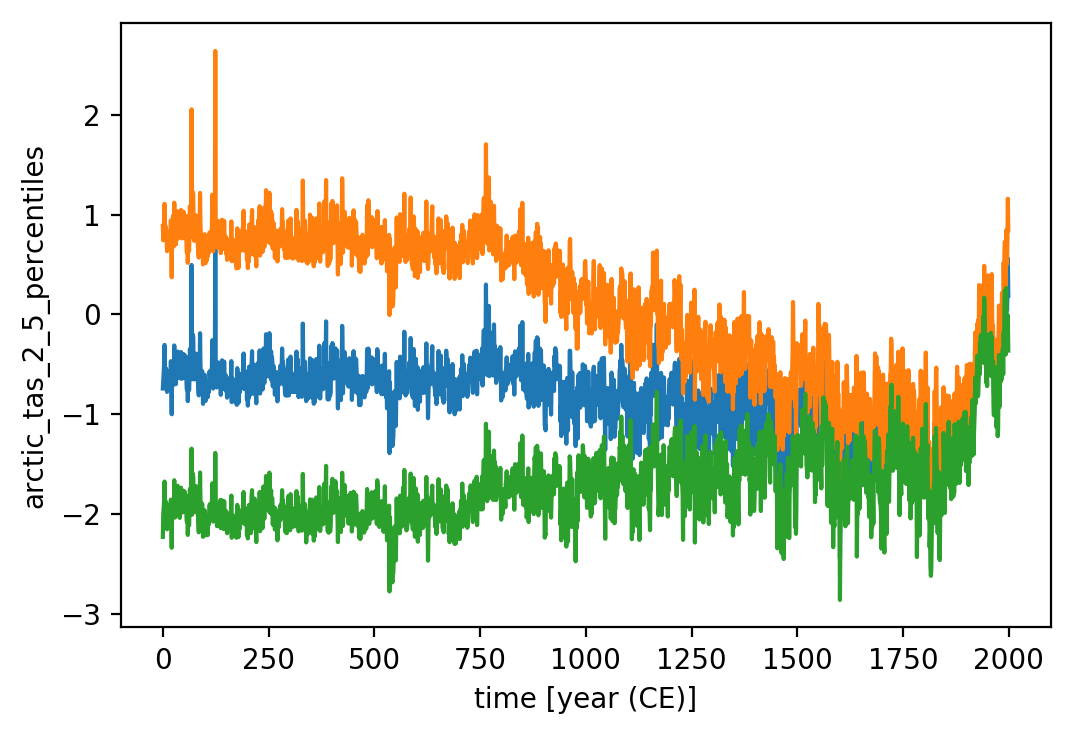

In [131]:
data_ccsm4.arctic_tas_ensemble_mean_anomalies.plot()
data_ccsm4.arctic_tas_97_5_percentiles.plot()
data_ccsm4.arctic_tas_2_5_percentiles.plot()

In [199]:
data_ccsm4 = xr.open_dataset(savedir+'Brennan_etal_2021_CCSM4_model_prior_reconstructions.nc')
data_mpi = xr.open_dataset(savedir+'Brennan_etal_2021_MPI_model_prior_reconstructions.nc')

In [221]:
data = data_ccsm4

In [222]:
data

<xarray.Dataset>
Dimensions:                                      (lat: 91, lon: 180, nens: 200, nit: 10, reg: 13, time: 2000)
Coordinates:
  * time                                         (time) int64 0 1 ... 1998 1999
  * reg                                          (reg) int64 0 1 2 ... 10 11 12
  * lat                                          (lat) float64 -89.01 ... 89.01
  * lon                                          (lon) float64 0.0 2.0 ... 358.0
  * nit                                          (nit) int64 0 1 2 3 4 5 6 7 8 9
  * nens                                         (nens) int64 0 1 2 ... 198 199
Data variables:
    si_area_anomalies                            (time, nens, nit) float64 ...
    si_area_ensemble_mean_anomalies              (time) float64 ...
    si_area_97_5_percentiles                     (time) float64 ...
    si_area_2_5_percentiles                      (time) float64 ...
    si_area_regional_anomalies                   (reg, time) float64 ...
    re

In [223]:
value1 = data.arctic_tas_ensemble_mean_anomalies
value2 = data.arctic_tas_anomalies
value3 = data.arctic_tas_ensemble_mean_anomalies_filtered
value4 = data.arctic_tas_97_5_percentiles
value5 = data.arctic_tas_2_5_percentiles

value1_anom = value1  - np.nanmean(value1[1979:],axis=0)
value2_anom = value2  - np.nanmean(value2[1979:,:,:],axis=0)
value3_anom = value3  - np.nanmean(value3[1979:],axis=0)
value4_anom = value4  - np.nanmean(value1[1979:],axis=0)
value5_anom = value5  - np.nanmean(value1[1979:],axis=0)

In [224]:
data

<xarray.Dataset>
Dimensions:                                      (lat: 91, lon: 180, nens: 200, nit: 10, reg: 13, time: 2000)
Coordinates:
  * time                                         (time) int64 0 1 ... 1998 1999
  * reg                                          (reg) int64 0 1 2 ... 10 11 12
  * lat                                          (lat) float64 -89.01 ... 89.01
  * lon                                          (lon) float64 0.0 2.0 ... 358.0
  * nit                                          (nit) int64 0 1 2 3 4 5 6 7 8 9
  * nens                                         (nens) int64 0 1 2 ... 198 199
Data variables:
    si_area_anomalies                            (time, nens, nit) float64 ...
    si_area_ensemble_mean_anomalies              (time) float64 ...
    si_area_97_5_percentiles                     (time) float64 ...
    si_area_2_5_percentiles                      (time) float64 ...
    si_area_regional_anomalies                   (reg, time) float64 ...
    re

In [225]:
data = data.drop('arctic_tas_ensemble_mean_anomalies')
data = data.drop('arctic_tas_anomalies')
data = data.drop('arctic_tas_ensemble_mean_anomalies_filtered')
data = data.drop('arctic_tas_97_5_percentiles')
data = data.drop('arctic_tas_2_5_percentiles')

In [226]:
data

<xarray.Dataset>
Dimensions:                            (lat: 91, lon: 180, nens: 200, nit: 10, reg: 13, time: 2000)
Coordinates:
  * time                               (time) int64 0 1 2 3 ... 1997 1998 1999
  * reg                                (reg) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * lat                                (lat) float64 -89.01 -87.03 ... 89.01
  * lon                                (lon) float64 0.0 2.0 4.0 ... 356.0 358.0
  * nit                                (nit) int64 0 1 2 3 4 5 6 7 8 9
  * nens                               (nens) int64 0 1 2 3 ... 196 197 198 199
Data variables:
    si_area_anomalies                  (time, nens, nit) float64 ...
    si_area_ensemble_mean_anomalies    (time) float64 ...
    si_area_97_5_percentiles           (time) float64 ...
    si_area_2_5_percentiles            (time) float64 ...
    si_area_regional_anomalies         (reg, time) float64 ...
    regions                            (reg) object ...
    si_extent_anomalies 

In [227]:
data = data.assign(arctic_tas_ensemble_mean_anomalies=value1_anom)
data = data.assign(arctic_tas_anomalies=value2_anom)
data = data.assign(arctic_tas_ensemble_mean_anomalies_filtered=value3_anom)
data = data.assign(arctic_tas_97_5_percentiles=value4_anom)
data = data.assign(arctic_tas_2_5_percentiles=value5_anom)

In [228]:
data.arctic_tas_anomalies

<xarray.DataArray 'arctic_tas_anomalies' (time: 2000, nens: 200, nit: 10)>
array([[[-1.351614e-02, -9.317961e-01, ..., -1.522009e+00, -6.852037e-01],
        [-1.530543e+00,  4.478012e-01, ..., -8.492239e-01,  8.990393e-01],
        ...,
        [ 1.820894e+00, -5.852746e-01, ..., -1.161965e+00, -8.303750e-01],
        [-1.352774e+00, -7.612854e-01, ...,  2.187486e-02,  1.405235e-01]],

       [[-1.553898e-01, -8.011469e-01, ..., -1.344866e+00, -9.311216e-01],
        [-1.613461e+00,  6.933202e-01, ..., -1.573063e+00,  3.374987e-01],
        ...,
        [ 9.130706e-01, -6.304714e-01, ..., -4.337268e-01, -7.666557e-01],
        [-1.015748e+00, -7.675583e-01, ...,  8.503563e-02, -5.079127e-01]],

       ...,

       [[ 6.758637e-01,  5.822027e-01, ...,  4.560865e-01,  7.974653e-01],
        [ 4.003936e-01,  7.669047e-01, ...,  4.463608e-01,  9.948021e-01],
        ...,
        [ 7.966064e-01,  4.957338e-01, ...,  3.442985e-01,  6.621669e-01],
        [ 5.553694e-01,  6.220970e-01, ..., 

In [229]:
data.arctic_tas_2_5_percentiles.attrs['anomalies_period'] = 'anomalies relative to 1979-1999 CE'
data.arctic_tas_ensemble_mean_anomalies.attrs['anomalies_period'] = 'anomalies relative to 1979-1999 CE'
data.arctic_tas_anomalies.attrs['anomalies_period'] = 'anomalies relative to 1979-1999 CE'
data.arctic_tas_97_5_percentiles.attrs['anomalies_period'] = 'anomalies relative to 1979-1999 CE'
data.arctic_tas_ensemble_mean_anomalies_filtered.attrs['anomalies_period'] = 'anomalies relative to 1979-1999 CE'

data.arctic_tas_2_5_percentiles.attrs['units'] = 'degrees C'
data.arctic_tas_ensemble_mean_anomalies.attrs['units'] = 'degrees C'
data.arctic_tas_anomalies.attrs['units'] = 'degrees C'
data.arctic_tas_97_5_percentiles.attrs['units'] = 'degrees C'
data.arctic_tas_ensemble_mean_anomalies_filtered.attrs['units'] = 'degrees C'

data.arctic_tas_2_5_percentiles.attrs['long_name'] = '2.5th percentile across all 2000 ensemble members of reconstructed total Arctic sea ice extent anomalies'
data.arctic_tas_ensemble_mean_anomalies.attrs['long_name'] = 'reconstructed ensemble mean Arctic (north of 60N) surface temperature anomalies'
data.arctic_tas_anomalies.attrs['long_name'] = 'reconstructed ensemble mean Arctic (north of 60N) surface temperature anomalies for all ensemble members Monte Carlo iterations'
data.arctic_tas_97_5_percentiles.attrs['long_name'] = '97.5th percentile across all 2000 ensemble members of reconstructed total Arctic sea ice extent anomalies'
data.arctic_tas_ensemble_mean_anomalies_filtered.attrs['long_name'] = 'reconstructed ensemble mean Arctic (north of 60N) surface temperature anomalies subjected to 20-year lowpass Butterworth filter'

In [230]:
data

<xarray.Dataset>
Dimensions:                                      (lat: 91, lon: 180, nens: 200, nit: 10, reg: 13, time: 2000)
Coordinates:
  * time                                         (time) int64 0 1 ... 1998 1999
  * reg                                          (reg) int64 0 1 2 ... 10 11 12
  * lat                                          (lat) float64 -89.01 ... 89.01
  * lon                                          (lon) float64 0.0 2.0 ... 358.0
  * nit                                          (nit) int64 0 1 2 3 4 5 6 7 8 9
  * nens                                         (nens) int64 0 1 2 ... 198 199
Data variables:
    si_area_anomalies                            (time, nens, nit) float64 ...
    si_area_ensemble_mean_anomalies              (time) float64 ...
    si_area_97_5_percentiles                     (time) float64 ...
    si_area_2_5_percentiles                      (time) float64 ...
    si_area_regional_anomalies                   (reg, time) float64 ...
    re

In [231]:
data.arctic_tas_anomalies

<xarray.DataArray 'arctic_tas_anomalies' (time: 2000, nens: 200, nit: 10)>
array([[[-1.351614e-02, -9.317961e-01, ..., -1.522009e+00, -6.852037e-01],
        [-1.530543e+00,  4.478012e-01, ..., -8.492239e-01,  8.990393e-01],
        ...,
        [ 1.820894e+00, -5.852746e-01, ..., -1.161965e+00, -8.303750e-01],
        [-1.352774e+00, -7.612854e-01, ...,  2.187486e-02,  1.405235e-01]],

       [[-1.553898e-01, -8.011469e-01, ..., -1.344866e+00, -9.311216e-01],
        [-1.613461e+00,  6.933202e-01, ..., -1.573063e+00,  3.374987e-01],
        ...,
        [ 9.130706e-01, -6.304714e-01, ..., -4.337268e-01, -7.666557e-01],
        [-1.015748e+00, -7.675583e-01, ...,  8.503563e-02, -5.079127e-01]],

       ...,

       [[ 6.758637e-01,  5.822027e-01, ...,  4.560865e-01,  7.974653e-01],
        [ 4.003936e-01,  7.669047e-01, ...,  4.463608e-01,  9.948021e-01],
        ...,
        [ 7.966064e-01,  4.957338e-01, ...,  3.442985e-01,  6.621669e-01],
        [ 5.553694e-01,  6.220970e-01, ..., 

In [232]:
data.to_netcdf(savedir+'Brennan_etal_2021_CCSM4_model_prior_reconstructions_all.nc')

In [220]:
data.to_netcdf(savedir+'Brennan_etal_2021_MPI_model_prior_reconstructions_all.nc')

In [148]:
data_ccsm4.to_netcdf(savedir+'Brennan_etal_2021_CCSM4_model_prior_reconstructions_all.nc')

In [134]:
data_ccsm4

<xarray.Dataset>
Dimensions:                                      (lat: 91, lon: 180, nens: 200, nit: 10, reg: 13, time: 2000)
Coordinates:
  * time                                         (time) int64 0 1 ... 1998 1999
  * reg                                          (reg) int64 0 1 2 ... 10 11 12
  * lat                                          (lat) float64 -89.01 ... 89.01
  * lon                                          (lon) float64 0.0 2.0 ... 358.0
  * nit                                          (nit) int64 0 1 2 3 4 5 6 7 8 9
  * nens                                         (nens) int64 0 1 2 ... 198 199
Data variables:
    si_area_anomalies                            (time, nens, nit) float64 ...
    si_area_ensemble_mean_anomalies              (time) float64 ...
    si_area_97_5_percentiles                     (time) float64 ...
    si_area_2_5_percentiles                      (time) float64 ...
    si_area_regional_anomalies                   (reg, time) float64 ...
    re

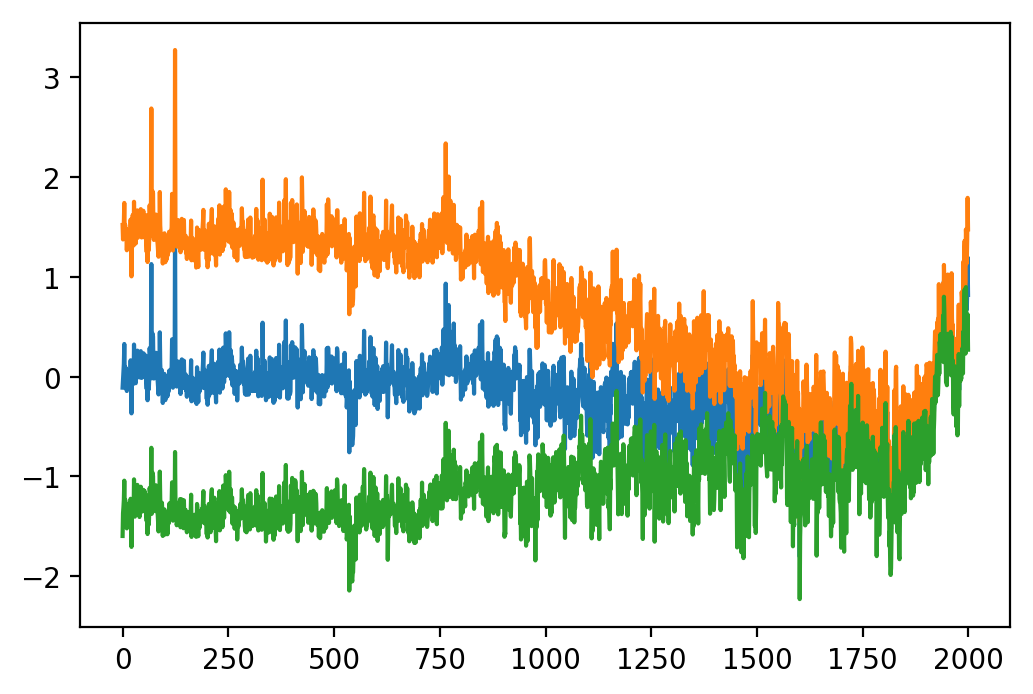

In [99]:
plt.plot(value1)
plt.plot(value4)
plt.plot(value5)

In [76]:
savedir = '/home/disk/p/mkb22/Documents/si_analysis_kb/common_era_experiments/data/'
savename = 'Brennan_etal_2021_CCSM4_model_prior_reconstructions.nc'

data_ccsm4.to_netcdf(savedir+savename)

In [78]:
data_sic_mpi = xr.open_dataset(savedir+'Brennan_etal_2021_MPI_model_prior_reconstructions_all.nc')
data_sic_mpi = data_sic_mpi.rename({'lot':'lon'})

In [83]:
data_mpi = xr.merge([data_sic_mpi,ds_mpi])
data_mpi = data_mpi.drop('lot')

In [85]:
savedir = '/home/disk/p/mkb22/Documents/si_analysis_kb/common_era_experiments/data/'
savename = 'Brennan_etal_2021_MPI_model_prior_reconstructions.nc'

data_mpi.to_netcdf(savedir+savename)

In [55]:
Wn2 = 1.0/20
nf2 = 7
b2,a2 = signal.butter(nf2,Wn2,btype='lowpass')
w2, h2 = signal.freqs(b2, a2)
#tas_ccsm4_filt20 = signal.filtfilt(b2,a2,gmtas_ensmn_ccsm4)
gmtas_mpi_filt20 = signal.filtfilt(b2,a2,gmtas_ensmn_mpi)

amtas_mpi_filt20 = signal.filtfilt(b2,a2,amtas_ensmn_mpi)
amtas_mpi_low_filt20 = signal.filtfilt(b2,a2,amtas_mpi_2_5)
amtas_mpi_high_filt20 = signal.filtfilt(b2,a2,amtas_mpi_97_5)

amtas_ccsm4_filt20 = signal.filtfilt(b2,a2,amtas_ensmn_ccsm4)
amtas_ccsm4_low_filt20 = signal.filtfilt(b2,a2,amtas_ccsm4_2_5)
amtas_ccsm4_high_filt20 = signal.filtfilt(b2,a2,amtas_ccsm4_97_5)

nhmtas_mpi_filt20 = signal.filtfilt(b2,a2,nhmtas_ensmn_mpi)
nhmtas_mpi_low_filt20 = signal.filtfilt(b2,a2,nhmtas_mpi_2_5)
nhmtas_mpi_high_filt20 = signal.filtfilt(b2,a2,nhmtas_mpi_97_5)

nhmtas_ccsm4_filt20 = signal.filtfilt(b2,a2,nhmtas_ensmn_ccsm4)
nhmtas_ccsm4_low_filt20 = signal.filtfilt(b2,a2,nhmtas_ccsm4_2_5)
nhmtas_ccsm4_high_filt20 = signal.filtfilt(b2,a2,nhmtas_ccsm4_97_5)

arctic2k_filt20 = signal.filtfilt(b2,a2,arctic2k_temp)
arctic2k_low_filt20 = signal.filtfilt(b2,a2,arctic2k_2sig_low)
arctic2k_high_filt20 = signal.filtfilt(b2,a2,arctic2k_2sig_high)

ntrend_filt20 = signal.filtfilt(b2,a2,ntrend_arcmn)
# ntrend_low_filt20 = signal.filtfilt(b2,a2,arctic2k_2sig_low)
# ntrend_high_filt20 = signal.filtfilt(b2,a2,arctic2k_2sig_high) 

sie_ccsm4_filt20 = signal.filtfilt(b2,a2,sie_ensmn_anom_allit_ccsm4)
sie_ccsm4_low_filt20 = signal.filtfilt(b2,a2,sie_2_5_allit_ccsm4)
sie_ccsm4_high_filt20 = signal.filtfilt(b2,a2,sie_97_5_allit_ccsm4)

sie_mpi_filt20 = signal.filtfilt(b2,a2,sie_ensmn_anom_allit_mpi)
sie_mpi_low_filt20 = signal.filtfilt(b2,a2,sie_2_5_allit_mpi)
sie_mpi_high_filt20 = signal.filtfilt(b2,a2,sie_97_5_allit_mpi)

/home/disk/chaos/mkb22/anaconda2/envs/lmr_py3_xarray/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


In [51]:
amtas_ensmn_mpi_filt20_61_90 = amtas_mpi_filt20 - np.nanmean(amtas_mpi_filt20[1961:1991])
amtas_ensmn_mpi_filt20_low_61_90 = amtas_mpi_low_filt20 - np.nanmean(amtas_mpi_filt20[1961:1991])
amtas_ensmn_mpi_filt20_high_61_90 = amtas_mpi_high_filt20 - np.nanmean(amtas_mpi_filt20[1961:1991])

amtas_ensmn_ccsm4_filt20_61_90 = amtas_ccsm4_filt20 - np.nanmean(amtas_ccsm4_filt20[1961:1991])
amtas_ensmn_ccsm4_filt20_low_61_90 = amtas_ccsm4_low_filt20 - np.nanmean(amtas_ccsm4_filt20[1961:1991])
amtas_ensmn_ccsm4_filt20_high_61_90 = amtas_ccsm4_high_filt20 - np.nanmean(amtas_ccsm4_filt20[1961:1991])

In [52]:
[ce_amtas_arctic2k_mpi_filt,
 corr_amtas_arctic2k_mpi_filt,_,_] = rrutils.find_ce_corr(amtas_ensmn_mpi_filt20_61_90, 
                                                          arctic2k_filt20,
                                                          arctic2k_years,
                                                          np.array(recon_years),0,2000)

[ce_amtas_arctic2k_mpi,
 corr_amtas_arctic2k_mpi,_,_] = rrutils.find_ce_corr(amtas_ensmn_mpi, 
                                                     arctic2k_temp,
                                                     arctic2k_years,
                                                     np.array(recon_years),0,2000)

[ce_amtas_arctic2k_ccsm4_filt,
 corr_amtas_arctic2k_ccsm4_filt,_,_] = rrutils.find_ce_corr(amtas_ensmn_ccsm4_filt20_61_90, 
                                                            arctic2k_filt20,
                                                            arctic2k_years,
                                                            np.array(recon_years),0,2000)

[ce_amtas_arctic2k_ccsm4,
 corr_amtas_arctic2k_ccsm4,_,_] = rrutils.find_ce_corr(amtas_ensmn_ccsm4, 
                                                       arctic2k_temp,
                                                       arctic2k_years,
                                                       np.array(recon_years),0,2000)

[ce_amtas_mpi_ccsm4,
 corr_amtas_mpi_ccsm4,_,_] = rrutils.find_ce_corr(amtas_ensmn_ccsm4, 
                                                       amtas_ensmn_mpi,
                                                       np.array(recon_years),
                                                       np.array(recon_years),0,2000)

[ce_amtas_mpi_ccsm4_filt,
 corr_amtas_mpi_ccsm4_filt,_,_] = rrutils.find_ce_corr(amtas_ensmn_mpi_filt20_61_90, 
                                                  amtas_ensmn_ccsm4_filt20_61_90,
                                                  np.array(recon_years),
                                                  np.array(recon_years),0,2000)

In [53]:
[ce_amtas_arctic2k_mpi_filt,
 corr_amtas_arctic2k_mpi_filt,_,_] = rrutils.find_ce_corr(amtas_ensmn_mpi_filt20_61_90, 
                                                          arctic2k_filt20,
                                                          arctic2k_years,
                                                          np.array(recon_years),0,2000)

[ce_amtas_arctic2k_mpi,
 corr_amtas_arctic2k_mpi,_,_] = rrutils.find_ce_corr(amtas_ensmn_mpi, 
                                                     arctic2k_temp,
                                                     arctic2k_years,
                                                     np.array(recon_years),0,2000)

[ce_amtas_arctic2k_ccsm4_filt,
 corr_amtas_arctic2k_ccsm4_filt,_,_] = rrutils.find_ce_corr(amtas_ensmn_ccsm4_filt20_61_90, 
                                                            arctic2k_filt20,
                                                            arctic2k_years,
                                                            np.array(recon_years),0,2000)

[ce_amtas_arctic2k_ccsm4,
 corr_amtas_arctic2k_ccsm4,_,_] = rrutils.find_ce_corr(amtas_ensmn_ccsm4, 
                                                       arctic2k_temp,
                                                       arctic2k_years,
                                                       np.array(recon_years),0,2000)

In [54]:
print("R^2: Arctic2k v MPI          = "+ str(np.round(corr_amtas_arctic2k_mpi**2,2)))
print("CE:  Arctic2k v MPI          = "+ str(np.round(ce_amtas_arctic2k_mpi,2))+'\n')
print("R^2: Arctic2k v MPI filtered = "+ str(np.round(corr_amtas_arctic2k_mpi_filt**2,2)))
print("CE:  Arctic2k v MPI filtered = "+ str(np.round(ce_amtas_arctic2k_mpi_filt,2))+'\n')

print("R^2: Arctic2k v CCSM4          = "+ str(np.round(corr_amtas_arctic2k_ccsm4**2,2)))
print("CE:  Arctic2k v CCSM4          = "+ str(np.round(ce_amtas_arctic2k_ccsm4,2))+'\n')
print("R^2: Arctic2k v CCSM4 filtered = "+ str(np.round(corr_amtas_arctic2k_ccsm4_filt**2,2)))
print("CE:  Arctic2k v CCSM4 filtered = "+ str(np.round(ce_amtas_arctic2k_ccsm4_filt,2))+'\n')

print("R^2: MPI v CCSM4          = "+ str(np.round(corr_amtas_mpi_ccsm4**2,2)))
print("CE:  MPI v CCSM4          = "+ str(np.round(ce_amtas_mpi_ccsm4,2))+'\n')
print("R^2: filtered MPI v CCSM4 filtered = "+ str(np.round(corr_amtas_mpi_ccsm4_filt**2,2)))
print("CE:  filtered MPI v CCSM4 filtered = "+ str(np.round(ce_amtas_mpi_ccsm4_filt,2))+'\n')

R^2: Arctic2k v MPI          = 0.31
CE:  Arctic2k v MPI          = -0.25

R^2: Arctic2k v MPI filtered = 0.67
CE:  Arctic2k v MPI filtered = 0.46

R^2: Arctic2k v CCSM4          = 0.27
CE:  Arctic2k v CCSM4          = -0.06

R^2: Arctic2k v CCSM4 filtered = 0.61
CE:  Arctic2k v CCSM4 filtered = 0.56

R^2: MPI v CCSM4          = 0.94
CE:  MPI v CCSM4          = 0.82

R^2: filtered MPI v CCSM4 filtered = 0.96
CE:  filtered MPI v CCSM4 filtered = 0.88



In [55]:
 ntrend_ds.time

<xarray.DataArray 'time' (time: 1265)>
array([ 750.,  751.,  752., ..., 2012., 2013., 2014.])
Coordinates:
  * time     (time) float64 750.0 751.0 752.0 ... 2.012e+03 2.013e+03 2.014e+03
Attributes:
    long_name:  Time
    units:      Year CE

In [56]:
[ce_amtas_ntrend_ccsm4_filt,
 corr_amtas_ntrend_ccsm4_filt,_,_] = rrutils.find_ce_corr(amtas_ensmn_ccsm4_filt20_61_90, 
                                                            ntrend_filt20,
                                                            ntrend_ds.time,
                                                            np.array(recon_years),750,1999)

[ce_amtas_ntrend_mpi_filt,
 corr_amtas_ntrend_mpi_filt,_,_] = rrutils.find_ce_corr(amtas_ensmn_mpi_filt20_61_90, 
                                                        ntrend_filt20,
                                                        ntrend_ds.time,
                                                        np.array(recon_years),750,1999)

[ce_amtas_ntrend_mpi,
 corr_amtas_ntrend_mpi,_,_] = rrutils.find_ce_corr(amtas_ensmn_mpi, 
                                                     ntrend_arcmn,
                                                     ntrend_ds.time,
                                                     np.array(recon_years),750,1999)

[ce_amtas_ntrend_ccsm4,
 corr_amtas_ntrend_ccsm4,_,_] = rrutils.find_ce_corr(amtas_ensmn_ccsm4, 
                                                     ntrend_arcmn,
                                                     ntrend_ds.time,
                                                     np.array(recon_years),750,1999)

print("R^2: NTREND v CCSM4 filtered = "+ str(np.round(corr_amtas_ntrend_ccsm4_filt**2,2)))
print("R^2: NTREND v MPI filtered = "+ str(np.round(corr_amtas_ntrend_mpi_filt**2,2))+'\n')

print("CE:  NTREND v CCSM4 filtered = "+ str(np.round(ce_amtas_ntrend_ccsm4_filt,2)))
print("CE:  NTREND v MPI filtered = "+ str(np.round(ce_amtas_ntrend_mpi_filt,2))+'\n')

print("R^2: NTREND v CCSM4 = "+ str(np.round(corr_amtas_ntrend_ccsm4**2,2)))
print("R^2: NTREND v MPI   = "+ str(np.round(corr_amtas_ntrend_mpi**2,2))+'\n')

print("CE:  NTREND v CCSM4 = "+ str(np.round(ce_amtas_ntrend_ccsm4,2)))
print("CE:  NTREND v MPI   = "+ str(np.round(ce_amtas_ntrend_mpi,2))+'\n')

R^2: NTREND v CCSM4 filtered = 0.79
R^2: NTREND v MPI filtered = 0.81

CE:  NTREND v CCSM4 filtered = -4.02
CE:  NTREND v MPI filtered = -2.23

R^2: NTREND v CCSM4 = 0.5
R^2: NTREND v MPI   = 0.55

CE:  NTREND v CCSM4 = -0.3
CE:  NTREND v MPI   = 0.15



In [57]:
ntrend_ds.time

<xarray.DataArray 'time' (time: 1265)>
array([ 750.,  751.,  752., ..., 2012., 2013., 2014.])
Coordinates:
  * time     (time) float64 750.0 751.0 752.0 ... 2.012e+03 2.013e+03 2.014e+03
Attributes:
    long_name:  Time
    units:      Year CE

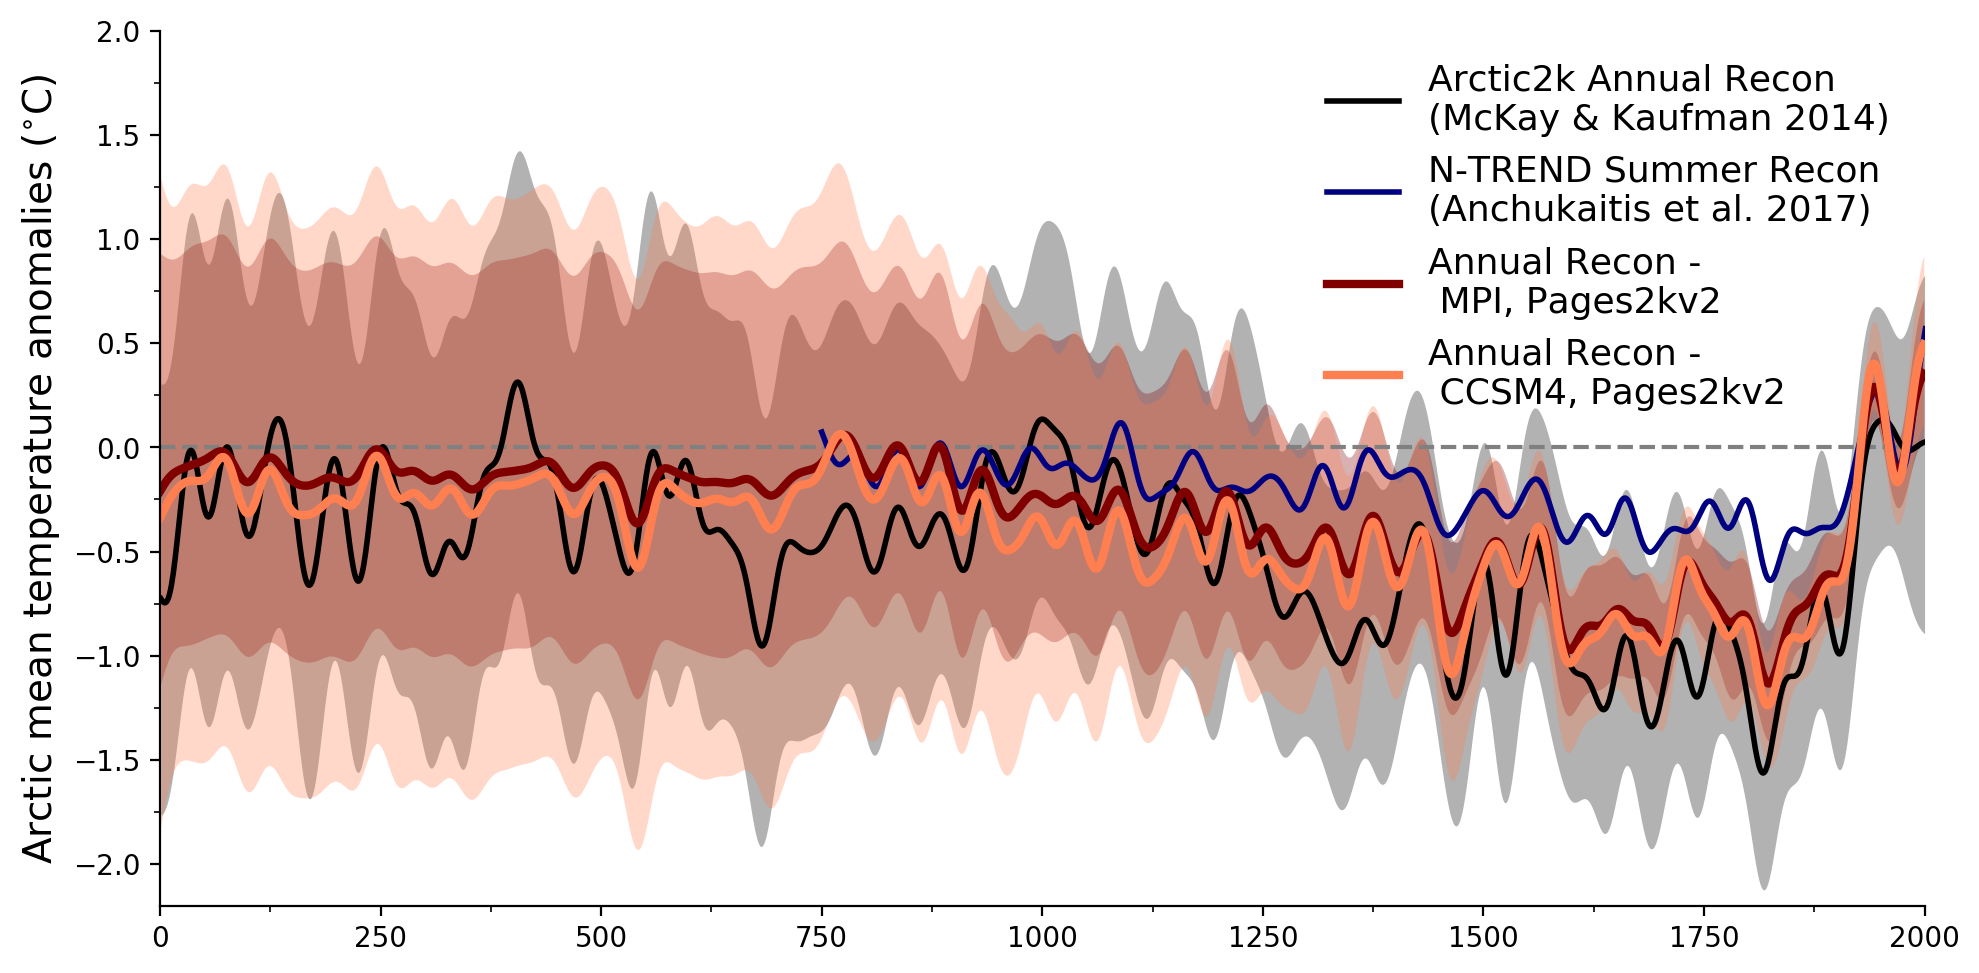

In [60]:
fig, ax_recon = plt.subplots(1, figsize=(10,5))

ax_recon.axhline(0,linestyle='--',color='grey')

# ax_recon.fill_between(recon_years,gmtas_mpi_2_5,gmtas_mpi_97_5,
#                       color='crimson',lw=0.01,alpha=0.5)
# ax_recon.plot(recon_years,tas_mpi_filt20,color='crimson',
#          label='GM Reconstruction - MPI, Pages2kv2',linewidth=2)


ax_recon.fill_between(arctic2k_years,arctic2k_low_filt20,arctic2k_high_filt20,
                      color='k',lw=0.01,alpha=0.3)
ax_recon.fill_between(recon_years,amtas_ensmn_mpi_filt20_low_61_90,amtas_ensmn_mpi_filt20_high_61_90,
                       color='maroon',lw=0.01,alpha=0.3)
ax_recon.fill_between(recon_years,amtas_ensmn_ccsm4_filt20_low_61_90,amtas_ensmn_ccsm4_filt20_high_61_90,
                       color='coral',lw=0.01,alpha=0.3)
# ax_recon.fill_between(recon_years,amtas_mpi_2_5,amtas_mpi_97_5,
#                       color='firebrick',lw=0.01,alpha=0.5)

ax_recon.plot(arctic2k_years,arctic2k_filt20, color='k',linewidth=2,
              label='Arctic2k Annual Recon \n(McKay & Kaufman 2014)')
ax_recon.plot(ntrend_ds.time,ntrend_filt20, color='navy',linewidth=2,
              label='N-TREND Summer Recon \n(Anchukaitis et al. 2017)')
ax_recon.plot(recon_years,amtas_ensmn_mpi_filt20_61_90,color='maroon',
         label='Annual Recon - \n MPI, Pages2kv2',linewidth=3)
ax_recon.plot(recon_years,amtas_ensmn_ccsm4_filt20_61_90,color='coral',
         label='Annual Recon - \n CCSM4, Pages2kv2',linewidth=3)

# ax_recon.fill_between(recon_years,nhmtas_mpi_2_5,nhmtas_mpi_97_5,
#                       color='mediumvioletred',lw=0.01,alpha=0.5)
# ax_recon.plot(recon_years,nhmtas_mpi_filt20,color='mediumvioletred',
#          label='NHM Reconstruction - MPI, Pages2kv2',linewidth=2)


ax_recon.set_ylabel('Arctic mean temperature anomalies ($^{\circ}$C)',fontsize=14)
#ax_recon.legend(fontsize=13,bbox_to_anchor=(1,0.95),frameon=False)
ax_recon.legend(fontsize=13,loc='upper right',frameon=False)

ax_recon.set_xlim(0,2000)
ax_recon.set_ylim(-2.2,2)

ax_recon.spines['top'].set_visible(False)
ax_recon.spines['right'].set_visible(False)

ax_recon.yaxis.set_minor_locator(MultipleLocator(0.25))
ax_recon.xaxis.set_minor_locator(MultipleLocator(125))

plt.subplots_adjust(wspace=0, hspace=0.05)

plt.tight_layout()

savedir = ('/home/disk/p/mkb22/Documents/si_analysis_kb/common_era_experiments/'+
           'analysis/figures/Brennan_Hakim_2020/')
savename = 'Arctic_tas_comparison_mpi_ccms4_ntrend_arctic2k.png'
plt.savefig(savedir+savename)



In [140]:
/home/disk/p/mkb22/Documents/si_analysis_kb/common_era_experiments/analysis/figures/Brennan_Hakim_2020/Arctic_tas_comparison_mpi_ccms4_ntrend_arctic2k.png

(array([ 0.10869773,  0.06250547,  0.06804325, ..., -0.48537381,
        -0.80824144, -0.46384731]),
 array([ 0.51024685,  0.44567068,  0.47556472, ..., -0.10601202,
        -0.39254064, -0.14475681]))

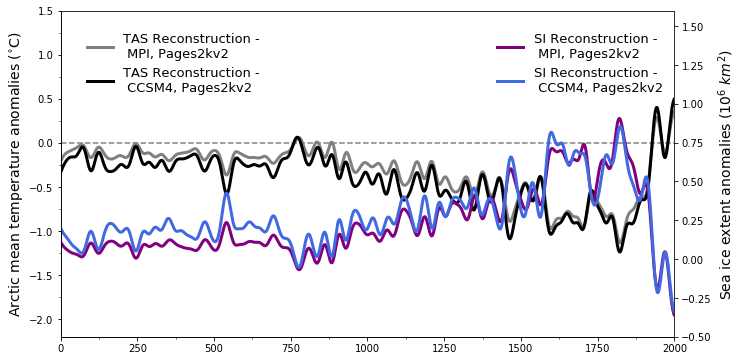

In [61]:
fig, ax_tas = plt.subplots(1, figsize=(11,6))
ax_sic = ax_tas.twinx()

ax_tas.axhline(0,linestyle='--',color='grey')


# ax_recon.fill_between(arctic2k_years,arctic2k_low_filt20,arctic2k_high_filt20,
#                       color='k',lw=0.01,alpha=0.3)
# ax_tas.fill_between(recon_years,amtas_ensmn_mpi_filt20_low_61_90,amtas_ensmn_mpi_filt20_high_61_90,
#                        color='firebrick',lw=0.01,alpha=0.3)
# ax_tas.fill_between(recon_years,amtas_ensmn_ccsm4_filt20_low_61_90,amtas_ensmn_ccsm4_filt20_high_61_90,
#                        color='orange',lw=0.01,alpha=0.3)

# ax_recon.plot(arctic2k_years,arctic2k_filt20, color='k',linewidth=2,
#               label='Arctic2k Reconstruction \n(McKay & Kaufman 2014)')
ax_tas.plot(recon_years,amtas_ensmn_mpi_filt20_61_90,color='gray',
         label='TAS Reconstruction - \n MPI, Pages2kv2',linewidth=3)
ax_tas.plot(recon_years,amtas_ensmn_ccsm4_filt20_61_90,color='k',
         label='TAS Reconstruction - \n CCSM4, Pages2kv2',linewidth=3)

ax_sic.plot(recon_years,sie_mpi_filt20,color='purple',
         label='SI Reconstruction - \n MPI, Pages2kv2',linewidth=3)
ax_sic.plot(recon_years,sie_ccsm4_filt20,color='royalblue',
         label='SI Reconstruction - \n CCSM4, Pages2kv2',linewidth=3)



ax_tas.set_ylabel('Arctic mean temperature anomalies ($^{\circ}$C)',fontsize=14)
ax_tas.legend(fontsize=13,bbox_to_anchor=(0.35,0.97),frameon=False)

ax_sic.set_ylabel('Sea ice extent anomalies (10$^{6}$ $km^2$)',fontsize=14)
ax_sic.legend(fontsize=13,bbox_to_anchor=(1,0.97),frameon=False)

ax_tas.set_xlim(0,2000)
ax_tas.set_ylim(-2.2,1.5)

ax_sic.set_xlim(0,2000)
ax_sic.set_ylim(-0.5,1.6)

ax_tas.spines['top'].set_visible(False)
ax_tas.spines['right'].set_visible(False)

ax_tas.yaxis.set_minor_locator(MultipleLocator(0.25))
ax_tas.xaxis.set_minor_locator(MultipleLocator(125))

plt.subplots_adjust(wspace=0, hspace=0.05)

savedir = ('/home/disk/p/mkb22/Documents/si_analysis_kb/common_era_experiments/'+
           'analysis/figures/Brennan_Hakim_2020/')
savename = 'tot_sie_mpi_v_sat_nobs_10it_0_2017.png'
#plt.savefig(savedir+savename)

In [63]:
[ce_amtas_sic_mpi,
 corr_amtas_sic_mpi,_,_] = rrutils.find_ce_corr(amtas_ensmn_mpi, 
                                                sie_ensmn_anom_allit_mpi,
                                                np.array(recon_years),
                                                np.array(recon_years),0,2000)

[ce_amtas_sic_mpi_filt,
 corr_amtas_sic_mpi_filt,_,_] = rrutils.find_ce_corr(amtas_ensmn_mpi_filt20_61_90, 
                                                       sie_mpi_filt20,
                                                       np.array(recon_years),
                                                       np.array(recon_years),0,2000)

[ce_amtas_sic_ccsm4,
 corr_amtas_sic_ccsm4,_,_] = rrutils.find_ce_corr(amtas_ensmn_ccsm4, 
                                                sie_ensmn_anom_allit_ccsm4,
                                                np.array(recon_years),
                                                np.array(recon_years),0,2000)

[ce_amtas_sic_ccsm4_filt,
 corr_amtas_sic_ccsm4_filt,_,_] = rrutils.find_ce_corr(amtas_ensmn_ccsm4_filt20_61_90, 
                                                       sie_ccsm4_filt20,
                                                       np.array(recon_years),
                                                       np.array(recon_years),0,2000)

In [67]:
print("R^2: TAS v SIE MPI            = "+ str(np.round(corr_amtas_sic_mpi**2,2)))
print("R^2: TAS v SIE MPI filtered   = "+ str(np.round(corr_amtas_sic_mpi_filt**2,2)))

print("R^2: TAS v SIE CCSM4          = "+ str(np.round(corr_amtas_sic_ccsm4**2,2)))
print("R^2: TAS v SIE CCSM4 filtered = "+ str(np.round(corr_amtas_sic_ccsm4_filt**2,2)))

# print("R^2: MPI v CCSM4          = "+ str(np.round(corr_amtas_mpi_ccsm4**2,2)))
# print("CE:  MPI v CCSM4          = "+ str(np.round(ce_amtas_mpi_ccsm4,2))+'\n')
# print("R^2: filtered MPI v CCSM4 filtered = "+ str(np.round(corr_amtas_mpi_ccsm4_filt**2,2)))
# print("CE:  filtered MPI v CCSM4 filtered = "+ str(np.round(ce_amtas_mpi_ccsm4_filt,2))+'\n')

R^2: TAS v SIE MPI            = 0.95
R^2: TAS v SIE MPI filtered   = 0.98
R^2: TAS v SIE CCSM4          = 0.87
R^2: TAS v SIE CCSM4 filtered = 0.93


In [157]:
def tls_regression(y,x,t):
    """
    Computes total least sqaures regression following Winton, (2011).
    
    input:  y = timeseries
            x = timeseries
            t = time array
    output: 
            b = slope
            y_int = y-intercept
    """
    dx = x-np.nanmean(x)
    dy = y-np.nanmean(y)
    n=len(dx)-1
    
    sx = np.sqrt(np.nansum(dx*dx)/n)
    sy = np.sqrt(np.nansum(dy*dy)/n)
    rhoyx = np.nansum(dy*dx)/(n*sx*sy)
    
    dt=t-np.nanmean(t)
    st=np.sqrt(np.nansum(dt*dt)/n)
    rhoxt=np.nansum(dx*dt)/(n*sx*st)
    rhoyt=np.nansum(dy*dt)/(n*sy*st)
    L = (sy**2/sx**2) * (1-rhoyt**2)/(1-rhoxt**2)
    
    b = ( sy**2-L*sx**2+np.sqrt( (sy**2-L*sx**2)**2 + 4*L*rhoyx**2*sy**2*sx**2 ) ) / ( 2*rhoyx*sy*sx ) ;
    y_int = np.nanmean(y)-b*np.nanmean(x)
    return b,y_int

In [261]:
ind_lm = ((np.array(recon_years)>850)&(np.array(recon_years)<=1850))

amtas_ensmn_ccsm4_lmanom = amtas_ensmn_ccsm4 - np.nanmean(amtas_ensmn_ccsm4[ind_lm])
sie_ensmn_anom_allit_ccsm4_lmanom = sie_ensmn_anom_allit_ccsm4 - np.nanmean(sie_ensmn_anom_allit_ccsm4[ind_lm])

amtas_ensmn_mpi_lmanom = amtas_ensmn_mpi - np.nanmean(amtas_ensmn_mpi[ind_lm])
sie_ensmn_anom_allit_mpi_lmanom = sie_ensmn_anom_allit_mpi - np.nanmean(sie_ensmn_anom_allit_mpi[ind_lm])

In [265]:
[ce_amtas_sic_mpi_truth,
 corr_amtas_sic_mpi_truth,_,_] = rrutils.find_ce_corr(amtas_mpi_anom,
                                                      sie_nh_mpi_anom,
                                                      mpi_time,mpi_time,850,1850)

[ce_amtas_sic_ccsm4_truth,
 corr_amtas_sic_ccsm4_truth,_,_] = rrutils.find_ce_corr(amtas_ccsm4_anom,sie_nh_ccsm4_truth_anom,
                                                        ccsm4_truth_time, ccsm4_truth_time,850,1850)

print("R^2: TAS v SIE MPI LM    = "+ str(np.round(corr_amtas_sic_mpi_truth**2,2)))
print("R^2: TAS v SIE CCSM4 LM  = "+ str(np.round(corr_amtas_sic_ccsm4_truth**2,2)))

R^2: TAS v SIE MPI LM    = 0.46
R^2: TAS v SIE CCSM4 LM  = 0.28


In [266]:
[ce_amtas_sic_mpi_lm,
 corr_amtas_sic_mpi_lm,_,_] = rrutils.find_ce_corr(amtas_ensmn_mpi_lmanom,
                                                      sie_ensmn_anom_allit_mpi_lmanom,
                                                      mpi_time,mpi_time,850,1850)

[ce_amtas_sic_ccsm4_lm,
 corr_amtas_sic_ccsm4_lm,_,_] = rrutils.find_ce_corr(amtas_ensmn_ccsm4_lmanom,
                                                        sie_ensmn_anom_allit_ccsm4_lmanom,
                                                        ccsm4_truth_time, ccsm4_truth_time,850,1850)

print("R^2: TAS v SIE MPI Recon (850-1850)    = "+ str(np.round(corr_amtas_sic_mpi_lm**2,2)))
print("R^2: TAS v SIE CCSM4 Recon (850-1850)  = "+ str(np.round(corr_amtas_sic_ccsm4_lm**2,2)))

R^2: TAS v SIE MPI Recon (850-1850)    = 0.93
R^2: TAS v SIE CCSM4 Recon (850-1850)  = 0.88


In [287]:
slope_amtas_sic_mpi,int_mpi = tls_regression(amtas_ensmn_mpi[ind_lm],sie_ensmn_anom_allit_mpi[ind_lm],
                                       np.array(recon_years)[ind_lm])
slope_amtas_sic_mpi_truth,int_mpi_truth = tls_regression(amtas_mpi_anom,sie_nh_mpi_anom,
                                             mpi_time)

slope_amtas_sic_ccsm4,int_ccsm4 = tls_regression(amtas_ensmn_ccsm4[ind_lm],sie_ensmn_anom_allit_ccsm4[ind_lm],
                                       np.array(recon_years)[ind_lm])
slope_amtas_sic_ccsm4_truth,int_ccsm4_truth = tls_regression(amtas_ccsm4_anom,sie_nh_ccsm4_truth_anom,
                                             ccsm4_truth_time)

print('slope MPI LM    = '+str(slope_amtas_sic_mpi_truth))
print('slope Recon MPI = '+str(slope_amtas_sic_mpi))

print('slope CCSM4 LM    = '+str(slope_amtas_sic_ccsm4_truth))
print('slope Recon CCSM4 = '+str(slope_amtas_sic_ccsm4))

slope MPI LM    = -0.9393091959730403
slope Recon MPI = -1.257528586621593
slope CCSM4 LM    = -1.1960329636683762
slope Recon CCSM4 = -1.3453253889439638


In [302]:
slope_mpi,intercept_mpi,_,_,_ = stats.linregress(amtas_ensmn_mpi[ind_lm],sie_ensmn_anom_allit_mpi[ind_lm])
slope_mpi_truth,intercept_mpi_truth,_,_,_ = stats.linregress(amtas_mpi_anom,sie_nh_mpi_anom)
slope_ccsm4,intercept_ccsm4,_,_,_ = stats.linregress(amtas_ensmn_ccsm4[ind_lm],sie_ensmn_anom_allit_ccsm4[ind_lm])
slope_ccsm4_truth,intercept_ccsm4_truth,_,_,_ = stats.linregress(amtas_ccsm4_anom,sie_nh_ccsm4_truth_anom)

print('slope MPI LM    = '+str(slope_mpi_truth))
print('slope Recon MPI = '+str(slope_mpi))

print('slope CCSM4 LM    = '+str(slope_ccsm4_truth))
print('slope Recon CCSM4 = '+str(slope_ccsm4))

slope MPI LM    = -0.7211179928163587
slope Recon MPI = -0.7639738693594998
slope CCSM4 LM    = -0.4363617182717008
slope Recon CCSM4 = -0.6690440288294829


In [293]:
slope_amtas_sic_mpi_truth, slope_amtas_sic_mpi

(-0.9393091959730403, -1.257528586621593)

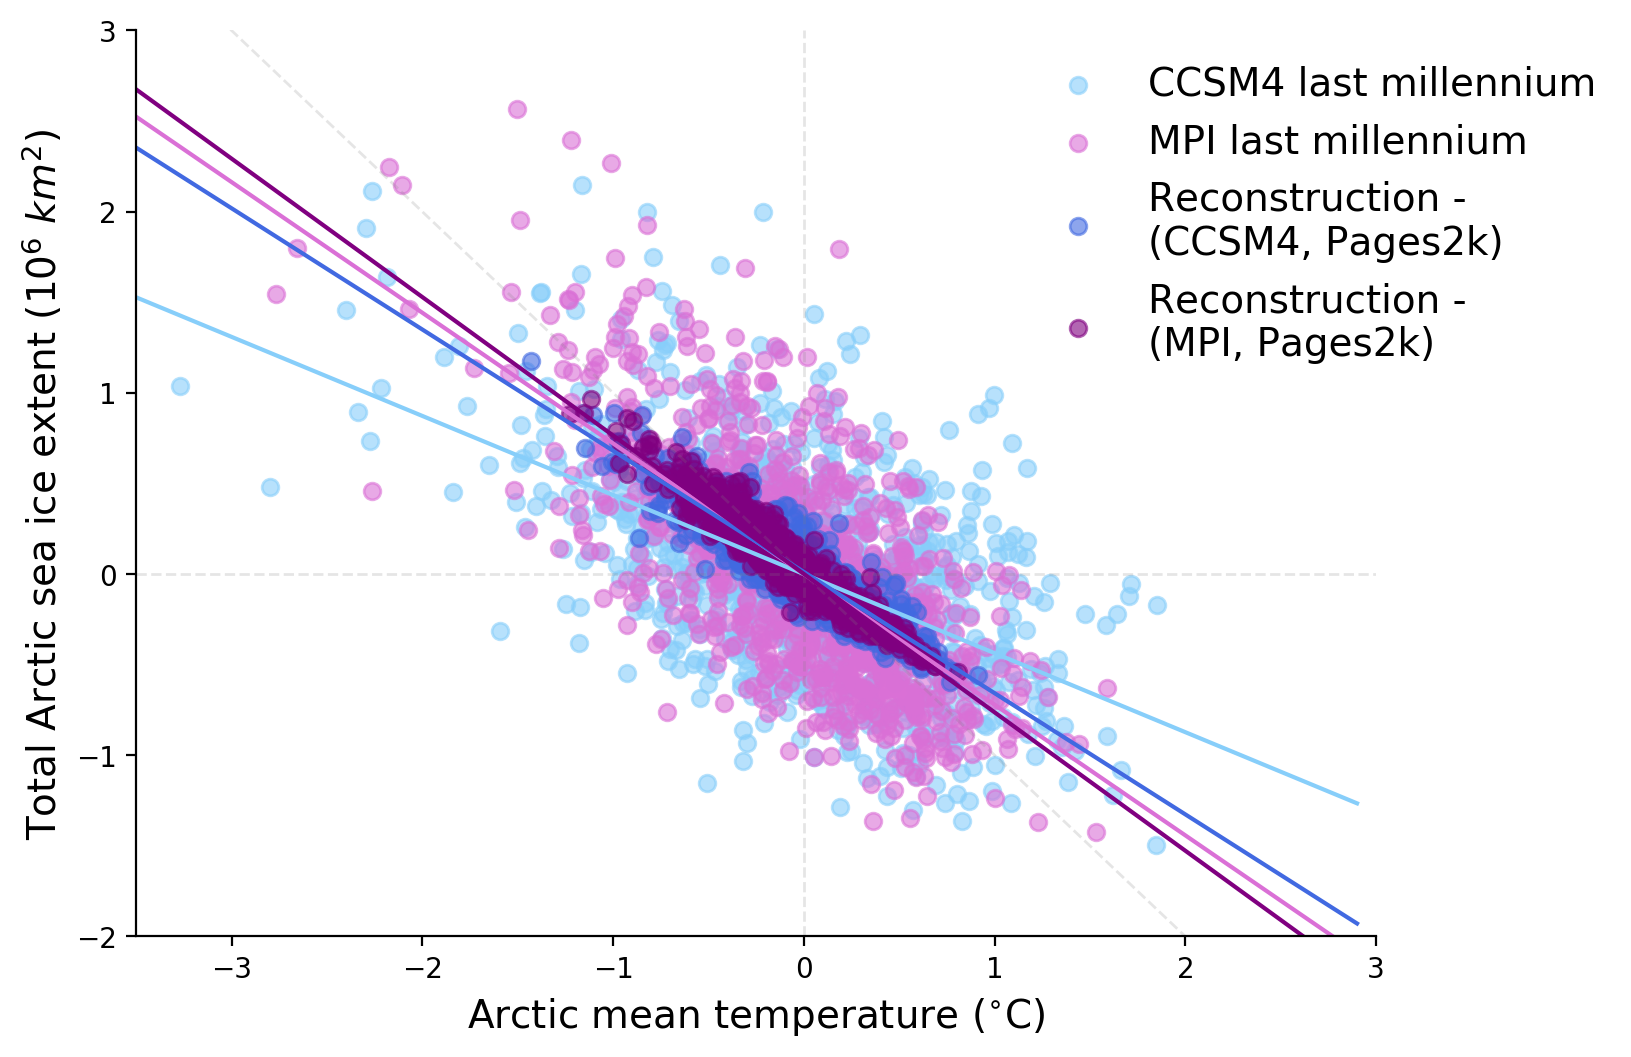

In [306]:
ind_lm = ((np.array(recon_years)>850)&(np.array(recon_years)<=1850))
x = np.arange(-3.5,3,0.1)

fig, ax_recon = plt.subplots(1, figsize=(8,6))

plt.axhline(0,linestyle='--',color='gray', alpha=0.2, linewidth=1)
plt.axvline(0,linestyle='--',color='gray', alpha=0.2, linewidth=1)
plt.plot(x,-x,linestyle='--',color='gray', alpha=0.2, linewidth=1)

plt.scatter(amtas_ccsm4_anom,sie_nh_ccsm4_truth_anom, color='lightskyblue', alpha=0.6, 
            label='CCSM4 last millennium')
plt.scatter(amtas_mpi_anom,sie_nh_mpi_anom, color='orchid', alpha=0.6, 
            label='MPI last millennium')

plt.scatter(amtas_ensmn_ccsm4_lmanom[ind_lm],sie_ensmn_anom_allit_ccsm4_lmanom[ind_lm], 
            color='royalblue', alpha=0.6, label='Reconstruction - \n(CCSM4, Pages2k)')
plt.scatter(amtas_ensmn_mpi_lmanom[ind_lm],sie_ensmn_anom_allit_mpi_lmanom[ind_lm], 
            color='purple', alpha=0.6, label='Reconstruction - \n(MPI, Pages2k)')

# plt.plot(x,slope_amtas_sic_ccsm4_truth*x+int_ccsm4_truth, color='lightskyblue')
# plt.plot(x,slope_amtas_sic_mpi_truth*x+int_mpi_truth, color='orchid')
# plt.plot(x,slope_amtas_sic_ccsm4*x+int_ccsm4, color='royalblue')
# plt.plot(x,slope_amtas_sic_mpi*x+int_mpi, color='purple')

plt.plot(x,slope_ccsm4_truth*x+intercept_ccsm4_truth, color='lightskyblue')
plt.plot(x,slope_mpi_truth*x+intercept_mpi_truth, color='orchid')
plt.plot(x,slope_ccsm4*x+intercept_ccsm4, color='royalblue')
plt.plot(x,slope_mpi*x+intercept_mpi, color='purple')

ax_recon.spines['top'].set_visible(False)
ax_recon.spines['right'].set_visible(False)

plt.xlim(-3.5,3)
plt.ylim(-2,3)

plt.xlabel('Arctic mean temperature ($^{\circ}$C)', fontsize=14)
plt.ylabel('Total Arctic sea ice extent (10$^{6}$ $km^2$)', fontsize=14)

plt.legend(bbox_to_anchor=[0.7,1],frameon=False, fontsize=14)

In [267]:
slope_amtas_sic_mpi,_ = tls_regression(amtas_ensmn_mpi[ind_lm],sie_ensmn_anom_allit_mpi[ind_lm],
                                       np.array(recon_years)[ind_lm])
slope_amtas_sic_mpi_truth,_ = tls_regression(amtas_mpi_anom,sie_nh_mpi_anom,
                                             mpi_time)

print('slope MPI LM    = '+str(slope_amtas_sic_mpi_truth))
print('slope Recon MPI = '+str(slope_amtas_sic_mpi))

slope MPI LM    = -0.9393091959730403
slope Recon MPI = -1.257528586621593


### Load observational temperature products: 

In [52]:
import sys, os
sys.path.insert(1,'/home/disk/p/mkb22/Documents/si_analysis_kb/instrumental_assimilation_experiments/')
import LMR_lite_utils as LMRlite

sys.path.insert(1,'/home/disk/p/mkb22/Documents/si_analysis_kb/instrumental_assimilation_experiments/Brennan_etal_2020/reconstruction_script/')
import LMR_config_greg

In [53]:
cfile = './configs/config.yml.test_full.ccsm4'

yaml_file = os.path.join(LMR_config_greg.SRC_DIR,cfile)
cfg = LMRlite.load_config(yaml_file)

Checking configuration ... 
OK!


In [54]:
[analysis_data,
analysis_time,
analysis_lat,
analysis_lon] = LMRlite.load_analyses(cfg,full_field=True,outfreq='annual')

loading annual-mean data...
loading GISTEMP...


/home/disk/kalman2/mkb22/pyLMR/load_gridded_data.py:126: RuntimeWarning: Mean of empty slice
  climo_month[i] = np.nanmean(value[indsmref], axis=0)
/home/disk/kalman2/mkb22/pyLMR/load_gridded_data.py:148: RuntimeWarning: Mean of empty slice
  tmp = np.nanmean(value[ind],axis=0)


loading HadCRUT...


/home/disk/kalman2/mkb22/pyLMR/load_gridded_data.py:269: RuntimeWarning: Mean of empty slice
  climo_month[i] = np.nanmean(value[indsmref], axis=0)
/home/disk/kalman2/mkb22/pyLMR/load_gridded_data.py:291: RuntimeWarning: Mean of empty slice
  tmp = np.nanmean(value[ind],axis=0)


loading BEST...


/home/disk/chaos/mkb22/anaconda2/envs/lmr_py3_xarray/lib/python3.6/site-packages/numpy/lib/function_base.py:733: UserWarning: WARNING: valid_min not used since it
cannot be safely cast to variable data type
  return array(a, order=order, copy=True)
/home/disk/chaos/mkb22/anaconda2/envs/lmr_py3_xarray/lib/python3.6/site-packages/numpy/lib/function_base.py:733: UserWarning: WARNING: valid_max not used since it
cannot be safely cast to variable data type
  return array(a, order=order, copy=True)
/home/disk/kalman2/mkb22/pyLMR/load_gridded_data.py:412: RuntimeWarning: Mean of empty slice
  tmp = np.nanmean(value[ind],axis=0)


loading MLOST...
returning spatial fields...


/home/disk/kalman2/mkb22/pyLMR/load_gridded_data.py:511: RuntimeWarning: Mean of empty slice
  climo_month[i] = np.nanmean(value[indsmref], axis=0)
/home/disk/kalman2/mkb22/pyLMR/load_gridded_data.py:533: RuntimeWarning: Mean of empty slice
  tmp = np.nanmean(value[ind],axis=0)


In [55]:
# TEMPORARY FIX FOR ANNUAL RECONS: 
gis_time_mo = np.reshape(analysis_time['GIS'][0:1644],(137,12))
gis_time_yr = gis_time_mo[:,1]
gis_data_mo = np.reshape(analysis_data['GIS'][0:1644],(137,12,90,180))
gis_annual = np.nanmean(gis_data_mo,axis=1)

# Correct GIS data to be annual averages: 
analysis_time['GIS'] = gis_time_yr
analysis_data['GIS']= gis_annual

/home/disk/chaos/mkb22/anaconda2/envs/lmr_py3_xarray/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """


In [56]:
products = ['GIS', 'CRU', 'BE', 'MLOST']
product_end = {'GIS':2015, 'CRU':2017, 'BE':2014, 'MLOST':2015}
gmtas_79_17 = {}
amtas_79_17 = {}

for p in products: 
    time_ind = np.where((analysis_time[p]>=1979)&(analysis_time[p]<=product_end[p]))
    
    amtas,_,_ = LMR_utils.global_hemispheric_means(analysis_data[p][:,analysis_lat[p]>=60,:],
                                                       analysis_lat[p][analysis_lat[p]>=60])
    gmtas,_,_ = LMR_utils.global_hemispheric_means(analysis_data[p][:,analysis_lat[p]>=60,:],
                                                       analysis_lat[p][analysis_lat[p]>=60])
    
    amtas_79_17[p] = amtas[time_ind]
    gmtas_79_17[p] = gmtas[time_ind]
    

### 40 year trends: 

In [47]:
win = 40
slope_amtas_sic_mpi_40 = np.zeros((2000-win))
slope_amtas_sic_ccsm4_40 = np.zeros((2000-win))
slope_gmtas_sic_mpi_40 = np.zeros((2000-win))
slope_gmtas_sic_ccsm4_40 = np.zeros((2000-win))

for i in range(2000-win):
#         slope_amtas_sic_mpi[j,i],_ = tls_regression(amtas_ensmn_mpi[i:i+win],sie_ensmn_anom_allit_mpi[i:i+win],
#                                               np.array(recon_years)[i:i+win])
    slope_amtas_sic_mpi_40[i],_,_,_,_ = stats.linregress(amtas_ensmn_mpi[i:i+win],
                                                         sie_ensmn_anom_allit_mpi[i:i+win])
    slope_amtas_sic_ccsm4_40[i],_,_,_,_ = stats.linregress(amtas_ensmn_ccsm4[i:i+win],
                                                             sie_ensmn_anom_allit_ccsm4[i:i+win])
    slope_gmtas_sic_mpi_40[i],_,_,_,_ = stats.linregress(gmtas_ensmn_mpi[i:i+win],
                                                           sie_ensmn_anom_allit_mpi[i:i+win])
    slope_gmtas_sic_ccsm4_40[i],_,_,_,_ = stats.linregress(gmtas_ensmn_ccsm4[i:i+win],
                                                             sie_ensmn_anom_allit_ccsm4[i:i+win])

In [49]:
slope_mpi_truth_am_40 = np.zeros((1001-win))
slope_ccsm4_truth_am_40 = np.zeros((1001-win))
slope_mpi_truth_gm_40 = np.zeros((1001-win))
slope_ccsm4_truth_gm_40 = np.zeros((1001-win))

trends_ccsm4_truth_amtas_40= np.zeros((1001-win))
trends_ccsm4_truth_sie_40= np.zeros((1001-win))
trends_mpi_truth_amtas_40= np.zeros((1001-win))
trends_mpi_truth_sie_40= np.zeros((1001-win))

for i in range(1001-win):
    slope_ccsm4_truth_am_40[i],_,_,_,_ = stats.linregress(amtas_ccsm4_anom[i:i+win],
                                                          sie_nh_ccsm4_truth_anom[i:i+win])
    slope_mpi_truth_am_40[i],_,_,_,_ = stats.linregress(amtas_mpi_anom[i:i+win],
                                                        sie_nh_mpi_anom[i:i+win])
    slope_ccsm4_truth_gm_40[i],_,_,_,_ = stats.linregress(gmtas_ccsm4_anom[i:i+win],
                                                          sie_nh_ccsm4_truth_anom[i:i+win])
    slope_mpi_truth_gm_40[i],_,_,_,_ = stats.linregress(gmtas_mpi_anom[i:i+win],
                                                        sie_nh_mpi_anom[i:i+win])
    
    trends_ccsm4_truth_amtas_40[i],_,_,_,_ = stats.linregress(ccsm4_truth_time[i:i+win],
                                                              amtas_ccsm4_anom[i:i+win])
    trends_mpi_truth_amtas_40[i],_,_,_,_ = stats.linregress(mpi_time[i:i+win],amtas_mpi_anom[i:i+win])
    trends_ccsm4_truth_sie_40[i],_,_,_,_ = stats.linregress(sie_nh_ccsm4_truth_anom[i:i+win],
                                                              amtas_ccsm4_anom[i:i+win])
    trends_mpi_truth_sie_40[i],_,_,_,_ = stats.linregress(mpi_time[i:i+win],sie_nh_mpi_anom[i:i+win])

In [50]:
slope_mpi_f770_am_40 = np.zeros((770-win))
slope_ccsm4_f770_am_40 = np.zeros((770-win))
slope_mpi_f770_gm_40 = np.zeros((770-win))
slope_ccsm4_f770_gm_40 = np.zeros((770-win))

for i in range(770-win):
    slope_ccsm4_f770_am_40[i],_,_,_,_ = stats.linregress(amtas_ensmn_ccsm4_f770[i:i+win],
                                                        sie_ensmn_anom_allit_ccsm4_f770[i:i+win])
    slope_mpi_f770_am_40[i],_,_,_,_ = stats.linregress(amtas_ensmn_mpi_f770[i:i+win],
                                                      sie_ensmn_anom_allit_mpi_f770[i:i+win])
    slope_ccsm4_f770_gm_40[i],_,_,_,_ = stats.linregress(gmtas_ensmn_ccsm4_f770[i:i+win],
                                                        sie_ensmn_anom_allit_ccsm4_f770[i:i+win])
    slope_mpi_f770_gm_40[i],_,_,_,_ = stats.linregress(gmtas_ensmn_mpi_f770[i:i+win],
                                                      sie_ensmn_anom_allit_mpi_f770[i:i+win])

In [60]:
slope_sat_am_40 = {}
slope_sat_gm_40 = {}
slope_sat_am_40_all = np.zeros(4)
slope_sat_gm_40_all = np.zeros(4)

for i,p in enumerate(products):
    end = np.where(fet_time < product_end[p])[0][-1]
    
    slope_sat_am_40[p],_,_,_,_ = stats.linregress(amtas_79_17[p],fet_sie_anom[:(end+2)])
    slope_sat_gm_40[p],_,_,_,_ = stats.linregress(gmtas_79_17[p],fet_sie_anom[:(end+2)])
    
    slope_sat_am_40_all[i] = slope_sat_am_40[p]
    slope_sat_gm_40_all[i] = slope_sat_gm_40[p]

In [58]:
slope_sat_am_40

{'GIS': -0.8101683737607616,
 'CRU': -0.809940189628661,
 'BE': -0.7251348943121305,
 'MLOST': -0.8111128943054704}

In [62]:
sat_slope_am_mn = np.nanmean(slope_sat_am_40_all)
sat_slope_am_std = np.std(slope_sat_am_40_all)

Text(0.5,0,'40-year window start year')

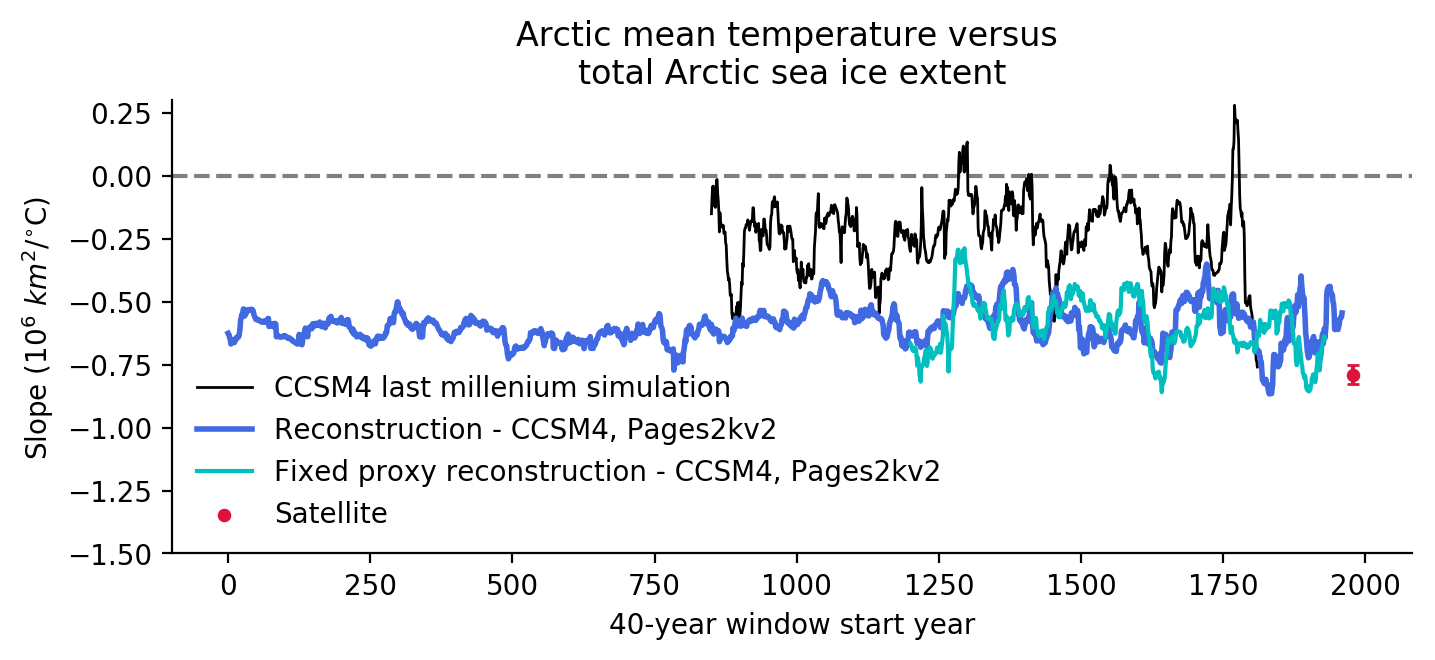

In [109]:
fig, ax_recon = plt.subplots(1, figsize=(8,3))

plt.axhline(0,color='gray', linestyle='--')

plt.plot(ccsm4_truth_time[:-win],slope_ccsm4_truth_am_40, linewidth=1, 
         label='CCSM4 last millenium simulation', color='k')
plt.plot(np.array(recon_years)[:-win],slope_amtas_sic_ccsm4_40, linewidth=2, 
         label='Reconstruction - CCSM4, Pages2kv2', color='royalblue')
plt.plot(recon_years_f770[:-win],slope_ccsm4_f770_am_40, linewidth=1.5, 
         label='Fixed proxy reconstruction - CCSM4, Pages2kv2', color='c')

plt.scatter(1979,sat_slope_am_mn,color='crimson',s=15, label='Satellite')
plt.errorbar(1979,sat_slope_am_mn,yerr=sat_slope_am_std,color='crimson',capsize=2)


plt.title('Arctic mean temperature versus \ntotal Arctic sea ice extent')
plt.legend(frameon=False, fontsize=10) #, bbox_to_anchor=[1,1])
plt.ylim(-1.5,0.3)

ax_recon.spines['top'].set_visible(False)
ax_recon.spines['right'].set_visible(False)

plt.ylabel('Slope (10$^{6}$ $km^2$/$^{\circ}$C)')
plt.xlabel('40-year window start year')

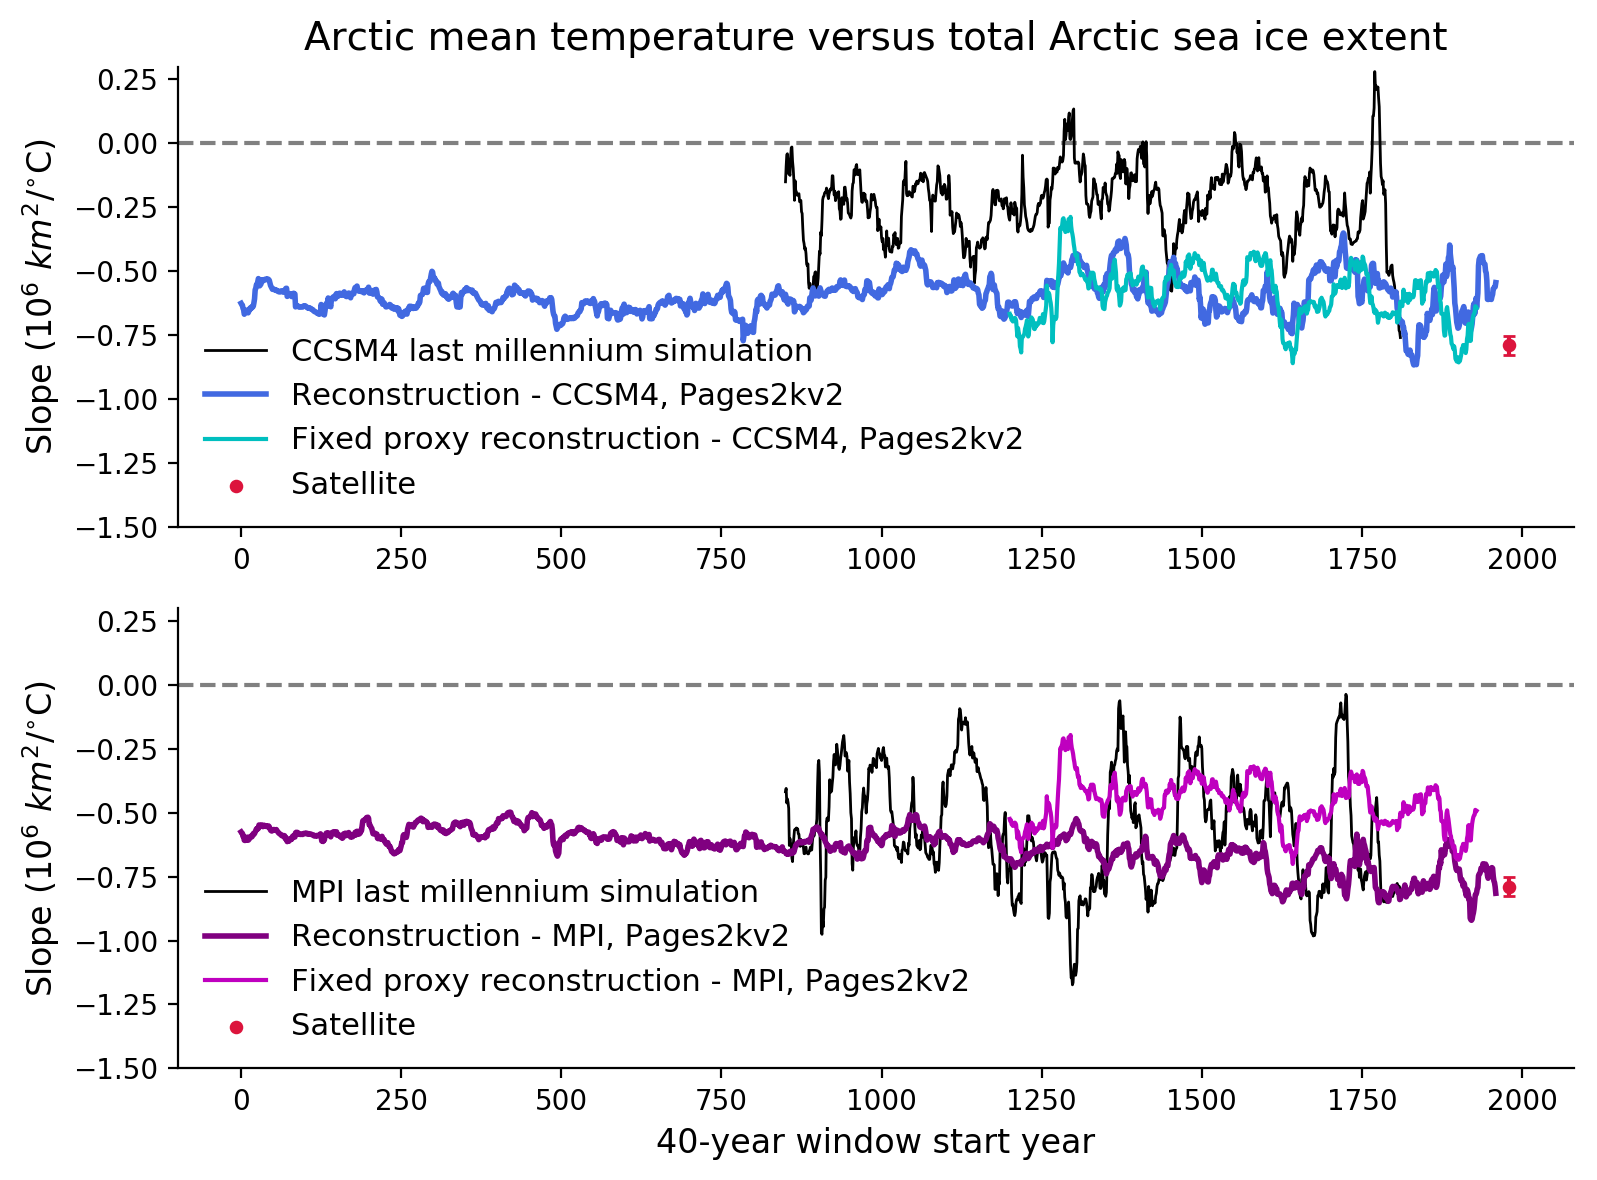

In [130]:
fig, ax = plt.subplots(2,1, figsize=(8,6))
ax = ax.flatten()

ax[0].axhline(0,color='gray', linestyle='--')

ax[0].plot(ccsm4_truth_time[:-win],slope_ccsm4_truth_am_40, linewidth=1, 
         label='CCSM4 last millennium simulation', color='k')
ax[0].plot(np.array(recon_years)[:-win],slope_amtas_sic_ccsm4_40, linewidth=2, 
         label='Reconstruction - CCSM4, Pages2kv2', color='royalblue')
ax[0].plot(recon_years_f770[:-win],slope_ccsm4_f770_am_40, linewidth=1.5, 
         label='Fixed proxy reconstruction - CCSM4, Pages2kv2', color='c')

ax[0].scatter(1979,sat_slope_am_mn,color='crimson',s=15, label='Satellite')
ax[0].errorbar(1979,sat_slope_am_mn,yerr=sat_slope_am_std,color='crimson',capsize=2)

ax[0].legend(frameon=False, fontsize=11) #, bbox_to_anchor=[1,1])
ax[0].set_ylim(-1.5,0.3)

ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)

ax[0].set_ylabel('Slope (10$^{6}$ $km^2$/$^{\circ}$C)', fontsize=12)
ax[0].set_title('Arctic mean temperature versus total Arctic sea ice extent', fontsize=14)

ax[1].axhline(0,color='gray', linestyle='--')

ax[1].plot(mpi_time[:-win],slope_mpi_truth_am_40[:-1], linewidth=1, 
         label='MPI last millennium simulation', color='k')
ax[1].plot(np.array(recon_years)[:-win],slope_amtas_sic_mpi_40, linewidth=2, 
         label='Reconstruction - MPI, Pages2kv2', color='purple')
ax[1].plot(recon_years_f770[:-win],slope_mpi_f770_am_40, linewidth=1.5, 
         label='Fixed proxy reconstruction - MPI, Pages2kv2', color='m')
# plt.plot(recon_years_f770[:-win_list[3]],slope_ccsm4_f770[3,:-(win_list[3]-win_list[0])], 
#          label=str(win_list[3])+' year window', color=colors[5])

ax[1].scatter(1979,sat_slope_am_mn,color='crimson',s=15, label='Satellite')
ax[1].errorbar(1979,sat_slope_am_mn,yerr=sat_slope_am_std,color='crimson',capsize=2)

#plt.title('Arctic mean temperature versus \ntotal Arctic sea ice extent')
ax[1].legend(frameon=False, loc='lower left', fontsize=11)
ax[1].set_ylim(-1.5,0.3)

ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

ax[1].set_ylabel('Slope (10$^{6}$ $km^2$/$^{\circ}$C)', fontsize=12)
ax[1].set_xlabel('40-year window start year', fontsize=12)
plt.tight_layout()
savedir = ('/home/disk/p/mkb22/Documents/si_analysis_kb/common_era_experiments/'+
           'analysis/figures/Brennan_Hakim_2020/')
savename = '40_year_trend_in_time.png'
plt.savefig(savedir+savename)

Text(0.5,0,'Window start year')

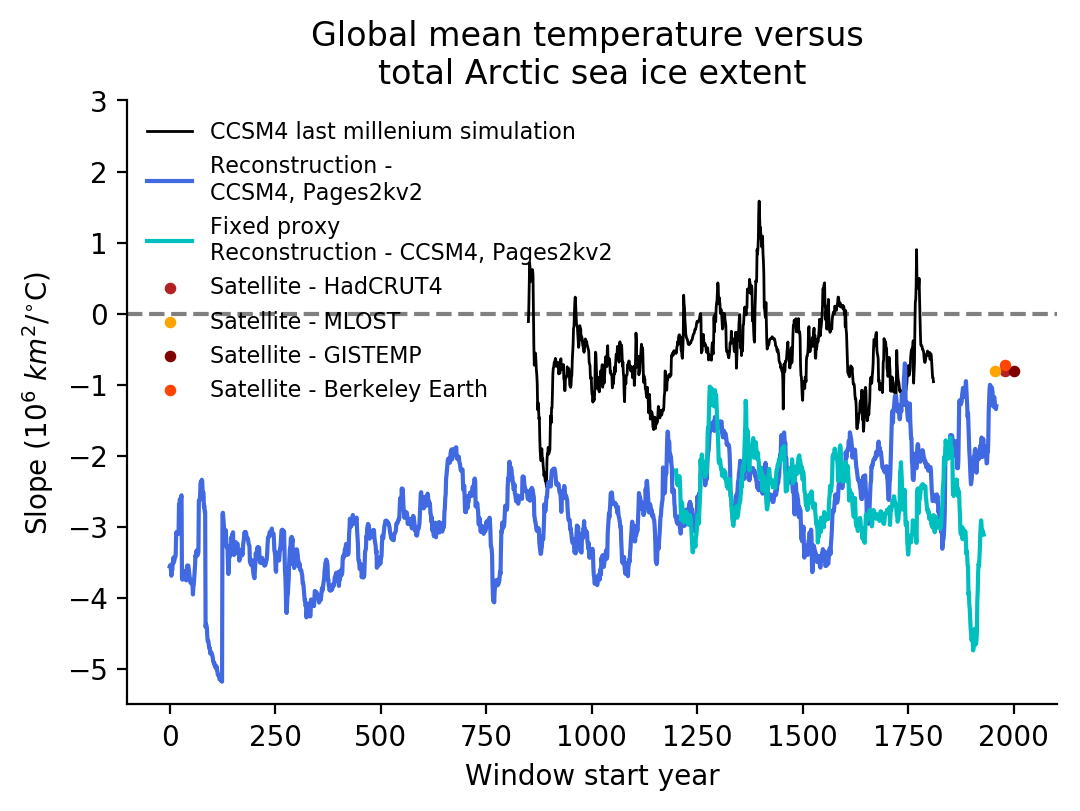

In [248]:
colors = plt.cm.Blues(np.linspace(0,1,8))

fig, ax_recon = plt.subplots(1, figsize=(6,4))

plt.axhline(0,color='gray', linestyle='--')

plt.plot(ccsm4_truth_time[:-win],slope_ccsm4_truth_gm_40, linewidth=1, 
         label='CCSM4 last millenium simulation', color='k')
plt.plot(np.array(recon_years)[:-win],slope_gmtas_sic_ccsm4_40, linewidth=1.5, 
         label='Reconstruction - \nCCSM4, Pages2kv2', color='royalblue')
plt.plot(recon_years_f770[:-win],slope_ccsm4_f770_gm_40, linewidth=1.5, 
         label='Fixed proxy \nReconstruction - CCSM4, Pages2kv2', color='c')
# plt.plot(recon_years_f770[:-win_list[3]],slope_ccsm4_f770[3,:-(win_list[3]-win_list[0])], 
#          label=str(win_list[3])+' year window', color=colors[5])

plt.scatter(1979,slope_sat_gm_40['CRU'],color='firebrick',s=10, label='Satellite - HadCRUT4')
plt.scatter(1955,slope_sat_gm_40['MLOST'],color='orange', s=10,label='Satellite - MLOST')
plt.scatter(2000,slope_sat_gm_40['GIS'],color='maroon',s=10, label='Satellite - GISTEMP')
plt.scatter(1979,slope_sat_gm_40['BE'],color='orangered',s=10, label='Satellite - Berkeley Earth')


plt.title('Global mean temperature versus \ntotal Arctic sea ice extent')
plt.legend(frameon=False, fontsize=8)
plt.ylim(-5.5,3)

ax_recon.spines['top'].set_visible(False)
ax_recon.spines['right'].set_visible(False)

plt.ylabel('Slope (10$^{6}$ $km^2$/$^{\circ}$C)')
plt.xlabel('Window start year')

Text(0.5,0,'40-year window start year')

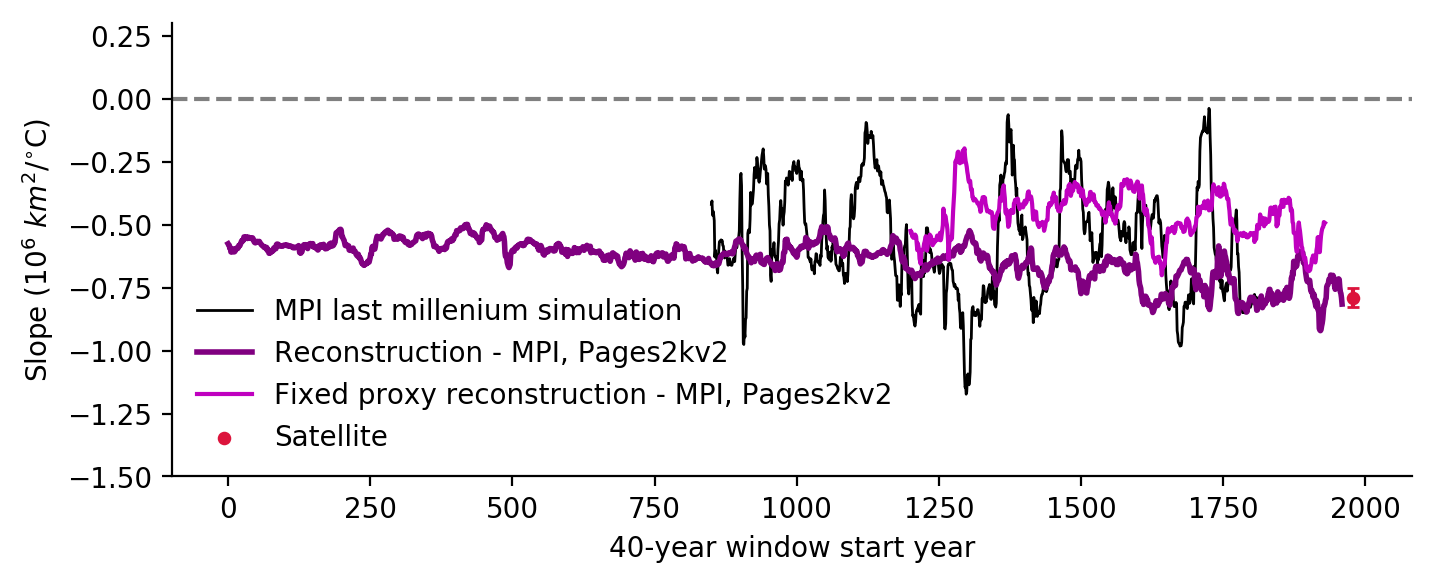

In [110]:
# colors = plt.cm.Blues(np.linspace(0,1,8))

fig, ax_recon = plt.subplots(1, figsize=(8,3))

plt.axhline(0,color='gray', linestyle='--')

plt.plot(mpi_time[:-win],slope_mpi_truth_am_40[:-1], linewidth=1, 
         label='MPI last millenium simulation', color='k')
plt.plot(np.array(recon_years)[:-win],slope_amtas_sic_mpi_40, linewidth=2, 
         label='Reconstruction - MPI, Pages2kv2', color='purple')
plt.plot(recon_years_f770[:-win],slope_mpi_f770_am_40, linewidth=1.5, 
         label='Fixed proxy reconstruction - MPI, Pages2kv2', color='m')
# plt.plot(recon_years_f770[:-win_list[3]],slope_ccsm4_f770[3,:-(win_list[3]-win_list[0])], 
#          label=str(win_list[3])+' year window', color=colors[5])

plt.scatter(1979,sat_slope_am_mn,color='crimson',s=15, label='Satellite')
plt.errorbar(1979,sat_slope_am_mn,yerr=sat_slope_am_std,color='crimson',capsize=2)

#plt.title('Arctic mean temperature versus \ntotal Arctic sea ice extent')
plt.legend(frameon=False, loc='lower left', fontsize=10)
plt.ylim(-1.5,0.3)

ax_recon.spines['top'].set_visible(False)
ax_recon.spines['right'].set_visible(False)

plt.ylabel('Slope (10$^{6}$ $km^2$/$^{\circ}$C)')
plt.xlabel('40-year window start year')

Text(0.5,0,'Window start year')

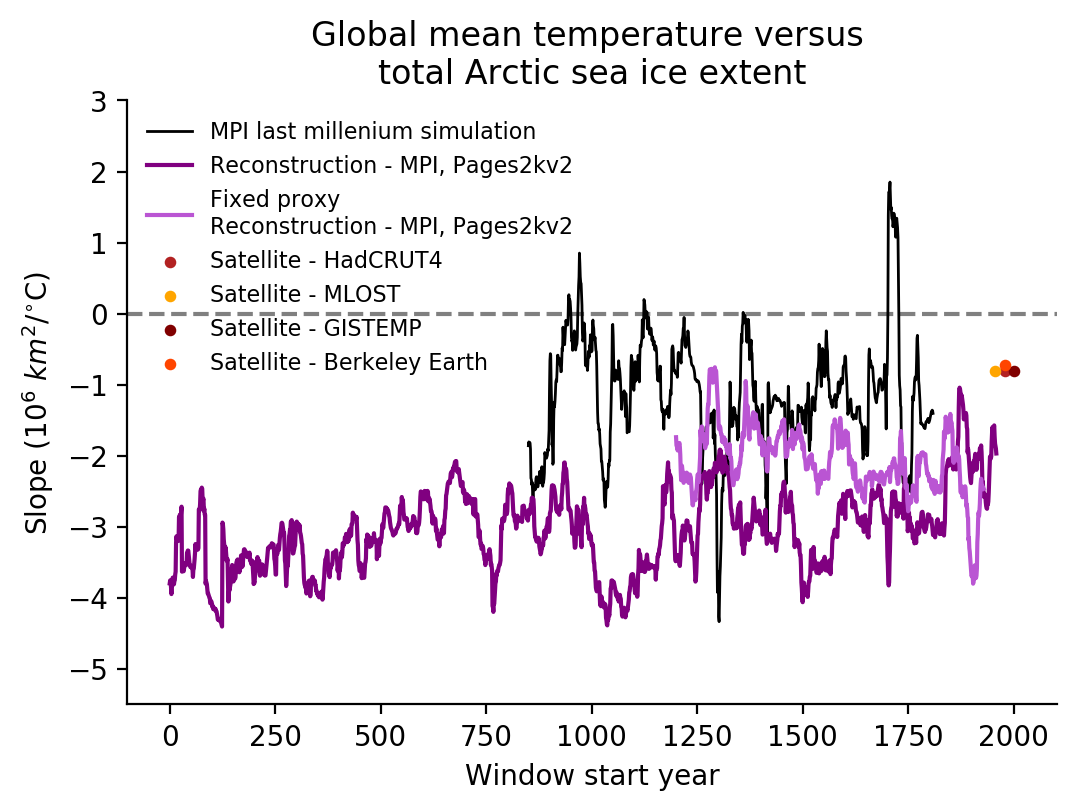

In [250]:
colors = plt.cm.Blues(np.linspace(0,1,8))

fig, ax_recon = plt.subplots(1, figsize=(6,4))

plt.axhline(0,color='gray', linestyle='--')

plt.plot(mpi_time[:-win],slope_mpi_truth_gm_40[:-1], linewidth=1, 
         label='MPI last millenium simulation', color='k')
plt.plot(np.array(recon_years)[:-win],slope_gmtas_sic_mpi_40, linewidth=1.5, 
         label='Reconstruction - MPI, Pages2kv2', color='purple')
plt.plot(recon_years_f770[:-win],slope_mpi_f770_gm_40, linewidth=1.5, 
         label='Fixed proxy \nReconstruction - MPI, Pages2kv2', color='mediumorchid')
# plt.plot(recon_years_f770[:-win_list[3]],slope_ccsm4_f770[3,:-(win_list[3]-win_list[0])], 
#          label=str(win_list[3])+' year window', color=colors[5])

plt.scatter(1979,slope_sat_gm_40['CRU'],color='firebrick',s=10, label='Satellite - HadCRUT4')
plt.scatter(1955,slope_sat_gm_40['MLOST'],color='orange', s=10,label='Satellite - MLOST')
plt.scatter(2000,slope_sat_gm_40['GIS'],color='maroon',s=10, label='Satellite - GISTEMP')
plt.scatter(1979,slope_sat_gm_40['BE'],color='orangered',s=10, label='Satellite - Berkeley Earth')


plt.title('Global mean temperature versus \ntotal Arctic sea ice extent')
plt.legend(frameon=False, fontsize=8)
plt.ylim(-5.5,3)

ax_recon.spines['top'].set_visible(False)
ax_recon.spines['right'].set_visible(False)

plt.ylabel('Slope (10$^{6}$ $km^2$/$^{\circ}$C)')
plt.xlabel('Window start year')

In [331]:
win_list = np.arange(50,451,50)
slope_amtas_sic_mpi = np.zeros((win_list.shape[0],2000-win_list.min()))
slope_amtas_sic_ccsm4 = np.zeros((win_list.shape[0],2000-win_list.min()))

for j,win in enumerate(win_list): 
    print(win)
    for i in range(2000-win):
#         slope_amtas_sic_mpi[j,i],_ = tls_regression(amtas_ensmn_mpi[i:i+win],sie_ensmn_anom_allit_mpi[i:i+win],
#                                               np.array(recon_years)[i:i+win])
        slope_amtas_sic_mpi[j,i],_,_,_,_ = stats.linregress(amtas_ensmn_mpi[i:i+win],
                                                            sie_ensmn_anom_allit_mpi[i:i+win])
        slope_amtas_sic_ccsm4[j,i],_,_,_,_ = stats.linregress(amtas_ensmn_ccsm4[i:i+win],
                                                              sie_ensmn_anom_allit_ccsm4[i:i+win])

50
100
150
200
250
300
350
400
450


In [344]:
win_list = np.arange(50,451,50)
slope_mpi_truth = np.zeros((win_list.shape[0],1000-win_list.min()))
slope_ccsm4_truth = np.zeros((win_list.shape[0],1000-win_list.min()))

for j,win in enumerate(win_list): 
    print(win)
    for i in range(1000-win):
        slope_ccsm4_truth[j,i],_,_,_,_ = stats.linregress(amtas_ccsm4_anom[i:i+win],
                                                          sie_nh_ccsm4_truth_anom[i:i+win])
        slope_mpi_truth[j,i],_,_,_,_ = stats.linregress(amtas_mpi_anom[i:i+win],
                                                        sie_nh_mpi_anom[i:i+win])


50
100
150
200
250
300
350
400
450


In [361]:
amtas_ensmn_ccsm4_f770.shape

(770,)

In [413]:
win_list = [25,50,75,100,150,200,250]
slope_mpi_f770 = np.zeros((len(win_list),770-win_list[0]))
slope_ccsm4_f770 = np.zeros((len(win_list),770-win_list[0]))
corr_amtas_sic_ccsm4_f770 = np.zeros((len(win_list),770-win_list[0]))

for j,win in enumerate(win_list): 
    print(win)
    for i in range(770-win):
        slope_ccsm4_f770[j,i],_,_,_,_ = stats.linregress(amtas_ensmn_ccsm4_f770[i:i+win],
                                                         sie_ensmn_anom_allit_ccsm4_f770[i:i+win])
        slope_mpi_f770[j,i],_,_,_,_ = stats.linregress(amtas_ensmn_mpi_f770[i:i+win],
                                                       sie_ensmn_anom_allit_mpi_f770[i:i+win])
        
        corr_amtas_sic_ccsm4_f770[j,i]= np.corrcoef(amtas_ensmn_ccsm4_f770[i:i+win], 
                                                    sie_ensmn_anom_allit_ccsm4_f770[i:i+win])[0,1]

25
50
75
100
150
200
250


In [409]:
np.array(recon_years_f770)[i:i+win],i,win

(array([1719, 1720, 1721, 1722, 1723, 1724, 1725, 1726, 1727, 1728, 1729,
        1730, 1731, 1732, 1733, 1734, 1735, 1736, 1737, 1738, 1739, 1740,
        1741, 1742, 1743, 1744, 1745, 1746, 1747, 1748, 1749, 1750, 1751,
        1752, 1753, 1754, 1755, 1756, 1757, 1758, 1759, 1760, 1761, 1762,
        1763, 1764, 1765, 1766, 1767, 1768, 1769, 1770, 1771, 1772, 1773,
        1774, 1775, 1776, 1777, 1778, 1779, 1780, 1781, 1782, 1783, 1784,
        1785, 1786, 1787, 1788, 1789, 1790, 1791, 1792, 1793, 1794, 1795,
        1796, 1797, 1798, 1799, 1800, 1801, 1802, 1803, 1804, 1805, 1806,
        1807, 1808, 1809, 1810, 1811, 1812, 1813, 1814, 1815, 1816, 1817,
        1818, 1819, 1820, 1821, 1822, 1823, 1824, 1825, 1826, 1827, 1828,
        1829, 1830, 1831, 1832, 1833, 1834, 1835, 1836, 1837, 1838, 1839,
        1840, 1841, 1842, 1843, 1844, 1845, 1846, 1847, 1848, 1849, 1850,
        1851, 1852, 1853, 1854, 1855, 1856, 1857, 1858, 1859, 1860, 1861,
        1862, 1863, 1864, 1865, 1866, 

In [412]:
corr = np.corrcoef(amtas_ensmn_ccsm4_f770[i:i+win], sie_ensmn_anom_allit_ccsm4_f770[i:i+win])[0,1]
corr[0,1]

-0.9089325861426234

Text(0.5,0,'Window start year')

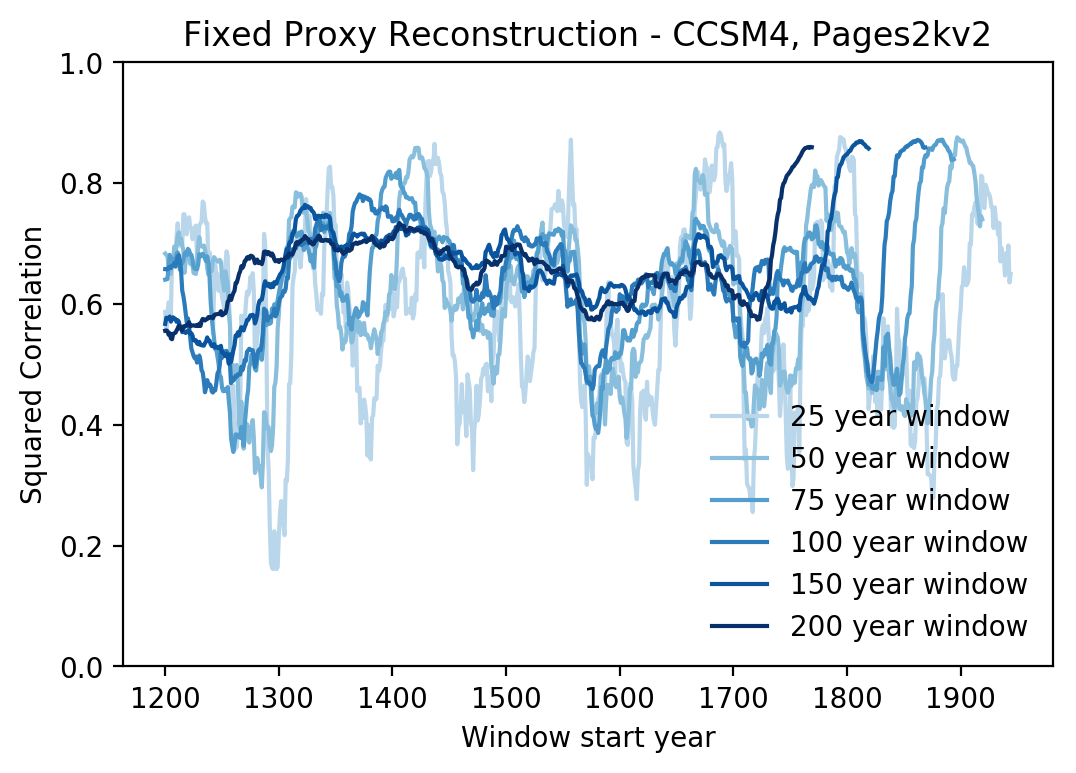

In [417]:
colors = plt.cm.Blues(np.linspace(0,1,8))

plt.plot(recon_years_f770[:-win_list[0]],corr_amtas_sic_ccsm4_f770[0,:]**2, 
         label=str(win_list[0])+' year window', color=colors[2])
plt.plot(recon_years_f770[:-win_list[1]],corr_amtas_sic_ccsm4_f770[1,:-(win_list[1]-win_list[0])]**2, 
         label=str(win_list[1])+' year window', color=colors[3])
plt.plot(recon_years_f770[:-win_list[2]],corr_amtas_sic_ccsm4_f770[2,:-(win_list[2]-win_list[0])]**2, 
         label=str(win_list[2])+' year window', color=colors[4])
plt.plot(recon_years_f770[:-win_list[3]],corr_amtas_sic_ccsm4_f770[3,:-(win_list[3]-win_list[0])]**2, 
         label=str(win_list[3])+' year window', color=colors[5])
plt.plot(recon_years_f770[:-win_list[4]],corr_amtas_sic_ccsm4_f770[4,:-(win_list[4]-win_list[0])]**2, 
         label=str(win_list[4])+' year window', color=colors[6])
plt.plot(recon_years_f770[:-win_list[5]],corr_amtas_sic_ccsm4_f770[5,:-(win_list[5]-win_list[0])]**2, 
         label=str(win_list[5])+' year window', color=colors[7])
# plt.plot(np.array(recon_years)[:-win_list[5]],slope_amtas_sic_mpi[5,:-(win_list[5]-win_list[0])], 
#          label=str(win_list[5]))
# plt.plot(np.array(recon_years)[:-win_list[6]],slope_amtas_sic_mpi[6,:-(win_list[6]-win_list[0])], 
#          label=str(win_list[6]))
# plt.plot(np.array(recon_years)[:-win_list[7]],slope_amtas_sic_mpi[7,:-(win_list[7]-win_list[0])], 
#          label=str(win_list[7]))
# plt.plot(np.array(recon_years)[:-win_list[8]],slope_amtas_sic_mpi[8,:-(win_list[8]-win_list[0])], 
#          label=str(win_list[8]))

plt.title('Fixed Proxy Reconstruction - CCSM4, Pages2kv2')
plt.legend(frameon=False)
plt.ylim(0,1)

plt.ylabel('Squared Correlation')
plt.xlabel('Window start year')

Text(0.5,0,'Window start year')

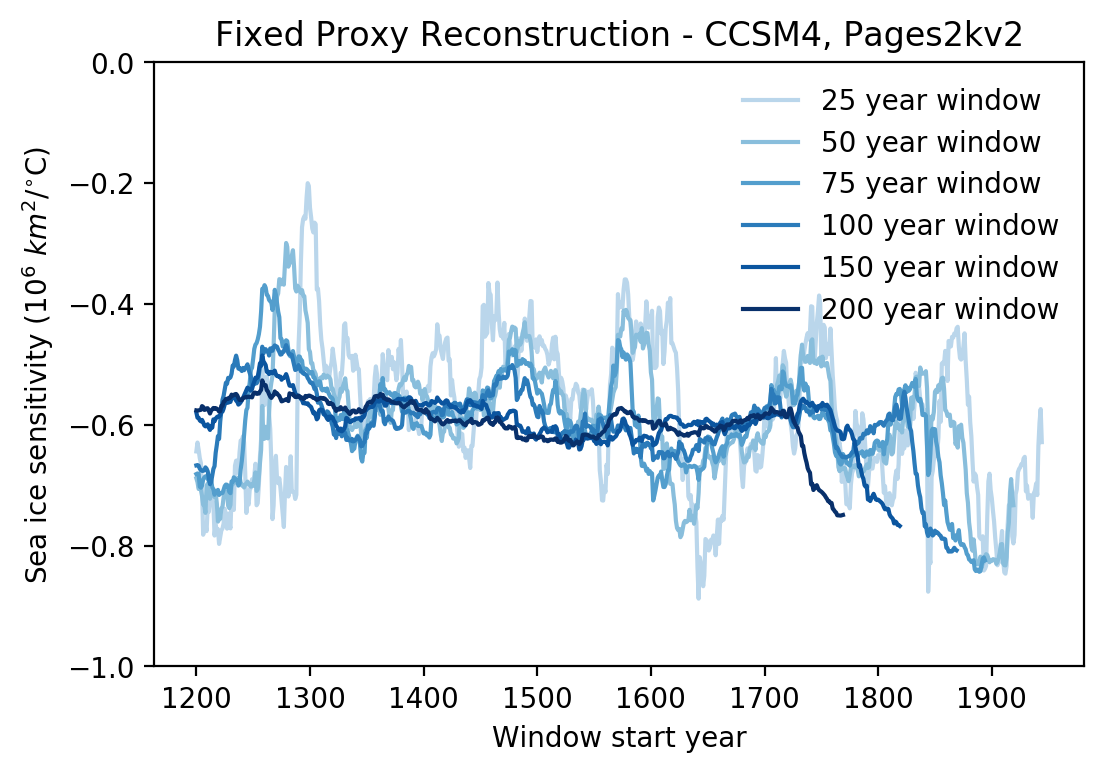

In [392]:
colors = plt.cm.Blues(np.linspace(0,1,8))

plt.plot(recon_years_f770[:-win_list[0]],slope_ccsm4_f770[0,:], 
         label=str(win_list[0])+' year window', color=colors[2])
plt.plot(recon_years_f770[:-win_list[1]],slope_ccsm4_f770[1,:-(win_list[1]-win_list[0])], 
         label=str(win_list[1])+' year window', color=colors[3])
plt.plot(recon_years_f770[:-win_list[2]],slope_ccsm4_f770[2,:-(win_list[2]-win_list[0])], 
         label=str(win_list[2])+' year window', color=colors[4])
plt.plot(recon_years_f770[:-win_list[3]],slope_ccsm4_f770[3,:-(win_list[3]-win_list[0])], 
         label=str(win_list[3])+' year window', color=colors[5])
plt.plot(recon_years_f770[:-win_list[4]],slope_ccsm4_f770[4,:-(win_list[4]-win_list[0])], 
         label=str(win_list[4])+' year window', color=colors[6])
plt.plot(recon_years_f770[:-win_list[5]],slope_ccsm4_f770[5,:-(win_list[5]-win_list[0])], 
         label=str(win_list[5])+' year window', color=colors[7])
# plt.plot(np.array(recon_years)[:-win_list[5]],slope_amtas_sic_mpi[5,:-(win_list[5]-win_list[0])], 
#          label=str(win_list[5]))
# plt.plot(np.array(recon_years)[:-win_list[6]],slope_amtas_sic_mpi[6,:-(win_list[6]-win_list[0])], 
#          label=str(win_list[6]))
# plt.plot(np.array(recon_years)[:-win_list[7]],slope_amtas_sic_mpi[7,:-(win_list[7]-win_list[0])], 
#          label=str(win_list[7]))
# plt.plot(np.array(recon_years)[:-win_list[8]],slope_amtas_sic_mpi[8,:-(win_list[8]-win_list[0])], 
#          label=str(win_list[8]))

plt.title('Fixed Proxy Reconstruction - CCSM4, Pages2kv2')
plt.legend(frameon=False)
plt.ylim(-1.0,0)

plt.ylabel('Sea ice sensitivity (10$^{6}$ $km^2$/$^{\circ}$C)')
plt.xlabel('Window start year')

Text(0.5,0,'Window start year')

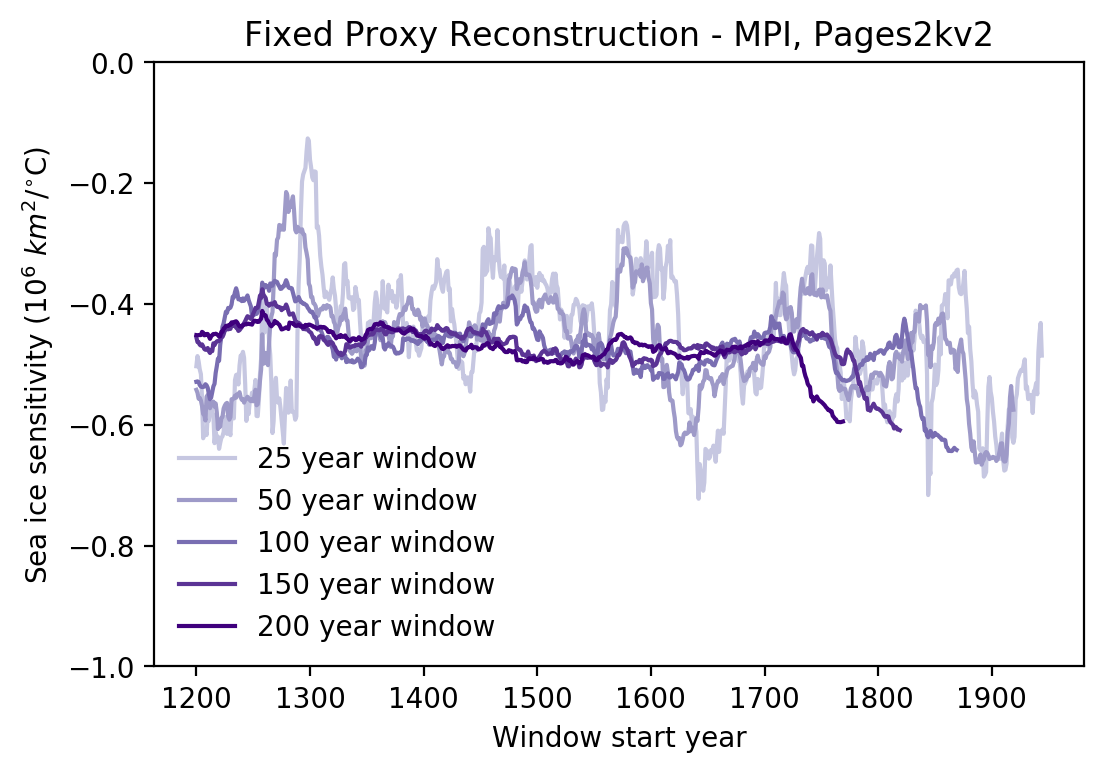

In [388]:
colors = plt.cm.Purples(np.linspace(0,1,7))

plt.plot(recon_years_f770[:-win_list[0]],slope_mpi_f770[0,:], 
         label=str(win_list[0])+' year window', color=colors[2])
plt.plot(recon_years_f770[:-win_list[1]],slope_mpi_f770[1,:-(win_list[1]-win_list[0])], 
         label=str(win_list[1])+' year window', color=colors[3])
plt.plot(recon_years_f770[:-win_list[2]],slope_mpi_f770[2,:-(win_list[2]-win_list[0])], 
         label=str(win_list[2])+' year window', color=colors[4])
plt.plot(recon_years_f770[:-win_list[3]],slope_mpi_f770[3,:-(win_list[3]-win_list[0])], 
         label=str(win_list[3])+' year window', color=colors[5])
plt.plot(recon_years_f770[:-win_list[4]],slope_mpi_f770[4,:-(win_list[4]-win_list[0])], 
         label=str(win_list[4])+' year window', color=colors[6])
# plt.plot(np.array(recon_years)[:-win_list[5]],slope_amtas_sic_mpi[5,:-(win_list[5]-win_list[0])], 
#          label=str(win_list[5]))
# plt.plot(np.array(recon_years)[:-win_list[6]],slope_amtas_sic_mpi[6,:-(win_list[6]-win_list[0])], 
#          label=str(win_list[6]))
# plt.plot(np.array(recon_years)[:-win_list[7]],slope_amtas_sic_mpi[7,:-(win_list[7]-win_list[0])], 
#          label=str(win_list[7]))
# plt.plot(np.array(recon_years)[:-win_list[8]],slope_amtas_sic_mpi[8,:-(win_list[8]-win_list[0])], 
#          label=str(win_list[8]))

plt.title('Fixed Proxy Reconstruction - MPI, Pages2kv2')
plt.legend(frameon=False)
plt.ylim(-1.0,0)

plt.ylabel('Sea ice sensitivity (10$^{6}$ $km^2$/$^{\circ}$C)')
plt.xlabel('Window start year')

Text(0.5,0,'Window start year')

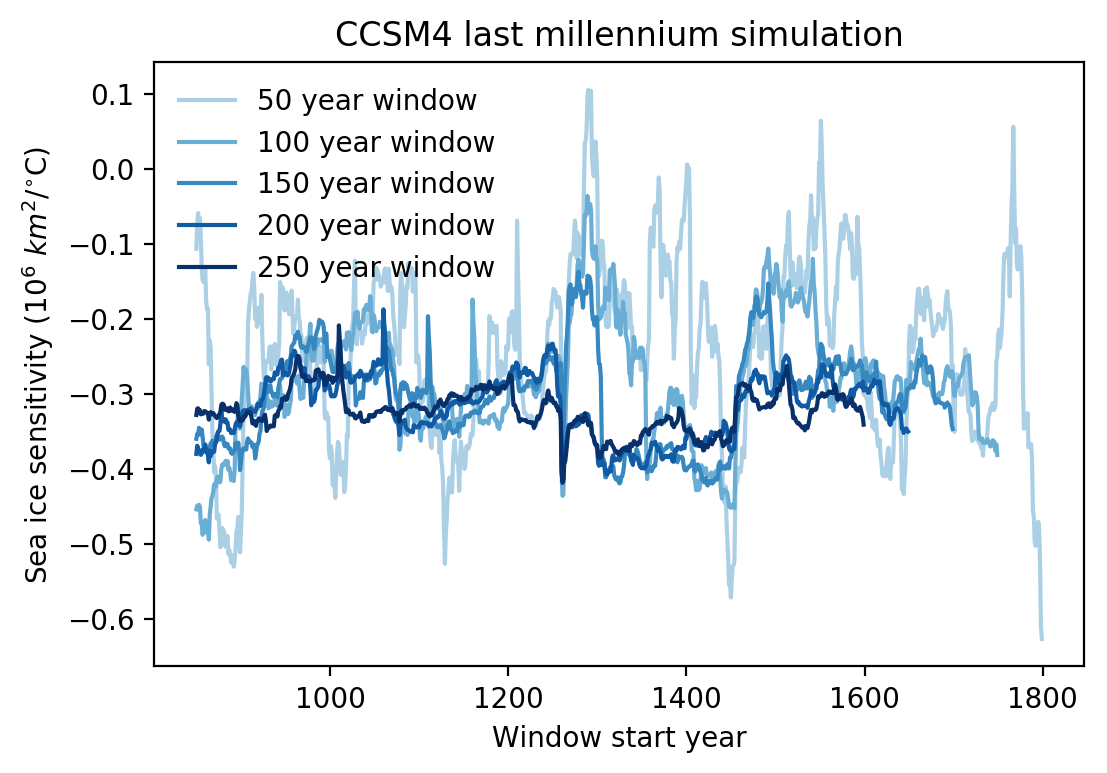

In [348]:
colors = plt.cm.Blues(np.linspace(0,1,7))

plt.plot(mpi_time[:-win_list[0]],slope_ccsm4_truth[0,:], 
         label=str(win_list[0])+' year window', color=colors[2])
plt.plot(mpi_time[:-win_list[1]],slope_ccsm4_truth[1,:-(win_list[1]-win_list[0])], 
         label=str(win_list[1])+' year window', color=colors[3])
plt.plot(mpi_time[:-win_list[2]],slope_ccsm4_truth[2,:-(win_list[2]-win_list[0])], 
         label=str(win_list[2])+' year window', color=colors[4])
plt.plot(mpi_time[:-win_list[3]],slope_ccsm4_truth[3,:-(win_list[3]-win_list[0])], 
         label=str(win_list[3])+' year window', color=colors[5])
plt.plot(mpi_time[:-win_list[4]],slope_ccsm4_truth[4,:-(win_list[4]-win_list[0])], 
         label=str(win_list[4])+' year window', color=colors[6])
# plt.plot(np.array(recon_years)[:-win_list[5]],slope_amtas_sic_mpi[5,:-(win_list[5]-win_list[0])], 
#          label=str(win_list[5]))
# plt.plot(np.array(recon_years)[:-win_list[6]],slope_amtas_sic_mpi[6,:-(win_list[6]-win_list[0])], 
#          label=str(win_list[6]))
# plt.plot(np.array(recon_years)[:-win_list[7]],slope_amtas_sic_mpi[7,:-(win_list[7]-win_list[0])], 
#          label=str(win_list[7]))
# plt.plot(np.array(recon_years)[:-win_list[8]],slope_amtas_sic_mpi[8,:-(win_list[8]-win_list[0])], 
#          label=str(win_list[8]))

plt.title('CCSM4 last millennium simulation')
plt.legend(frameon=False)

plt.ylabel('Sea ice sensitivity (10$^{6}$ $km^2$/$^{\circ}$C)')
plt.xlabel('Window start year')

Text(0.5,0,'Window start year')

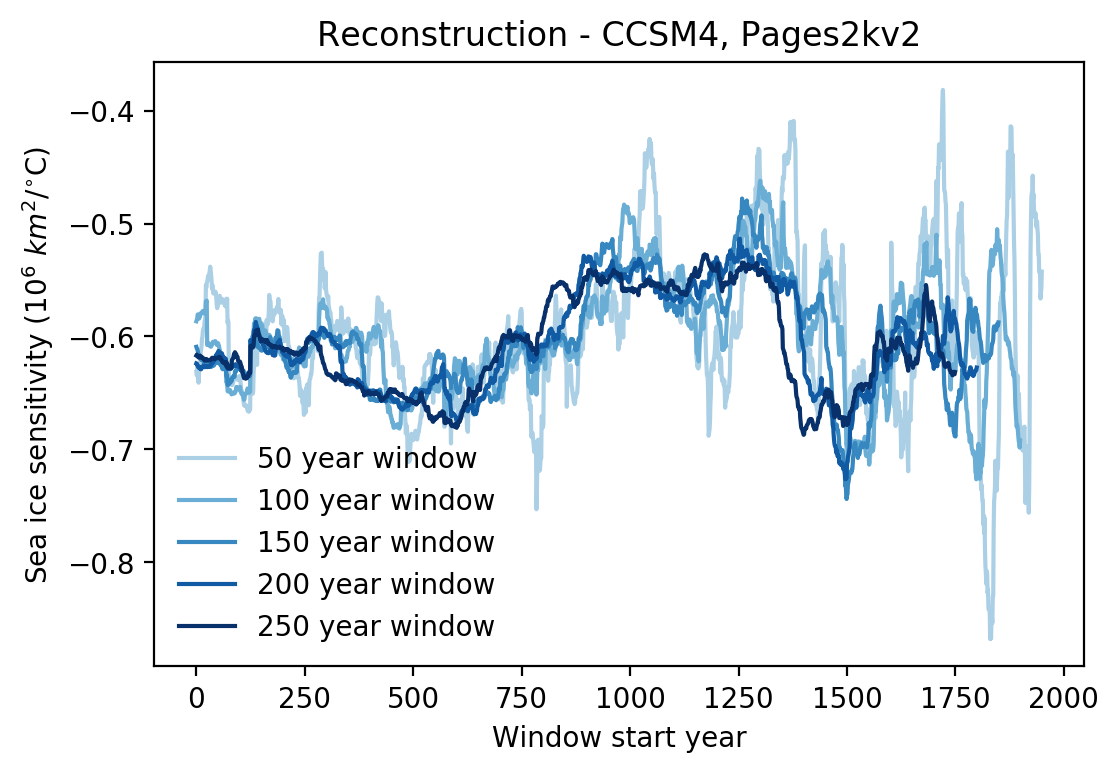

In [350]:
colors = plt.cm.Blues(np.linspace(0,1,7))

plt.plot(np.array(recon_years)[:-win_list[0]],slope_amtas_sic_ccsm4[0,:], 
         label=str(win_list[0])+' year window', color=colors[2])
plt.plot(np.array(recon_years)[:-win_list[1]],slope_amtas_sic_ccsm4[1,:-(win_list[1]-win_list[0])], 
         label=str(win_list[1])+' year window', color=colors[3])
plt.plot(np.array(recon_years)[:-win_list[2]],slope_amtas_sic_ccsm4[2,:-(win_list[2]-win_list[0])], 
         label=str(win_list[2])+' year window', color=colors[4])
plt.plot(np.array(recon_years)[:-win_list[3]],slope_amtas_sic_ccsm4[3,:-(win_list[3]-win_list[0])], 
         label=str(win_list[3])+' year window', color=colors[5])
plt.plot(np.array(recon_years)[:-win_list[4]],slope_amtas_sic_ccsm4[4,:-(win_list[4]-win_list[0])], 
         label=str(win_list[4])+' year window', color=colors[6])
# plt.plot(np.array(recon_years)[:-win_list[5]],slope_amtas_sic_mpi[5,:-(win_list[5]-win_list[0])], 
#          label=str(win_list[5]))
# plt.plot(np.array(recon_years)[:-win_list[6]],slope_amtas_sic_mpi[6,:-(win_list[6]-win_list[0])], 
#          label=str(win_list[6]))
# plt.plot(np.array(recon_years)[:-win_list[7]],slope_amtas_sic_mpi[7,:-(win_list[7]-win_list[0])], 
#          label=str(win_list[7]))
# plt.plot(np.array(recon_years)[:-win_list[8]],slope_amtas_sic_mpi[8,:-(win_list[8]-win_list[0])], 
#          label=str(win_list[8]))

plt.title('Reconstruction - CCSM4, Pages2kv2')
plt.legend(frameon=False)

plt.ylabel('Sea ice sensitivity (10$^{6}$ $km^2$/$^{\circ}$C)')
plt.xlabel('Window start year')

Text(0.5,0,'Window start year')

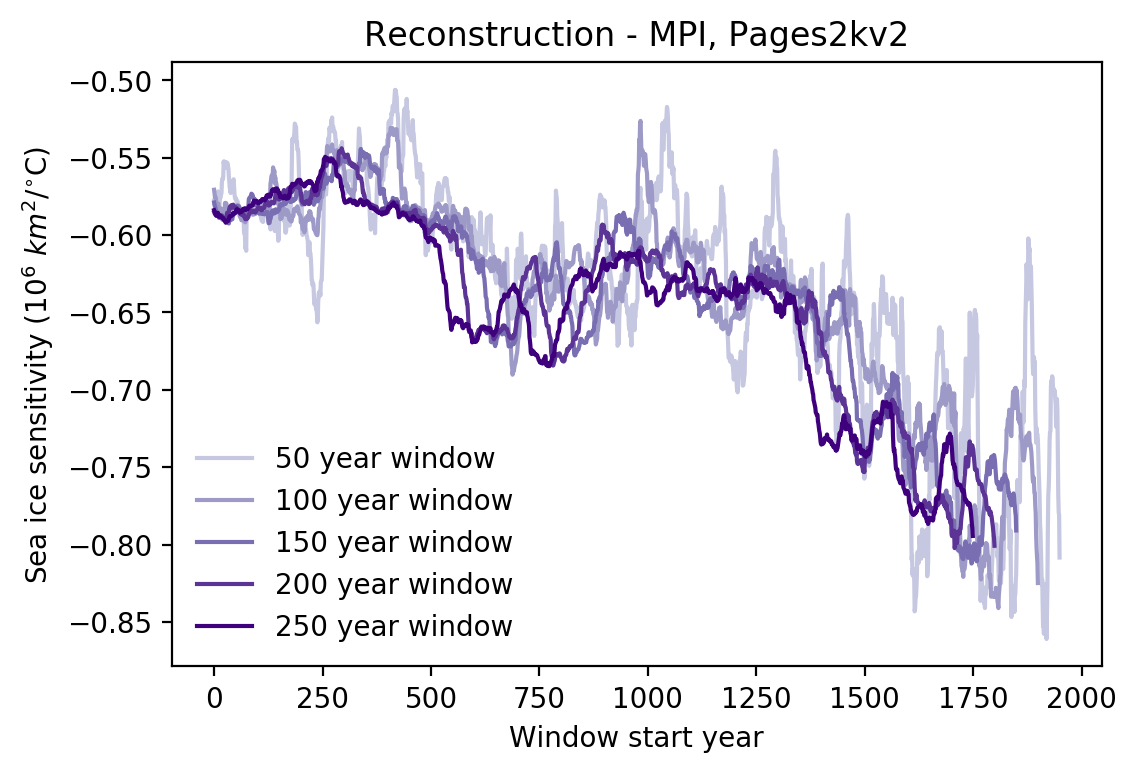

In [351]:
colors = plt.cm.Purples(np.linspace(0,1,7))

plt.plot(np.array(recon_years)[:-win_list[0]],slope_amtas_sic_mpi[0,:], 
         label=str(win_list[0])+' year window', color=colors[2])
plt.plot(np.array(recon_years)[:-win_list[1]],slope_amtas_sic_mpi[1,:-(win_list[1]-win_list[0])], 
         label=str(win_list[1])+' year window', color=colors[3])
plt.plot(np.array(recon_years)[:-win_list[2]],slope_amtas_sic_mpi[2,:-(win_list[2]-win_list[0])], 
         label=str(win_list[2])+' year window', color=colors[4])
plt.plot(np.array(recon_years)[:-win_list[3]],slope_amtas_sic_mpi[3,:-(win_list[3]-win_list[0])], 
         label=str(win_list[3])+' year window', color=colors[5])
plt.plot(np.array(recon_years)[:-win_list[4]],slope_amtas_sic_mpi[4,:-(win_list[4]-win_list[0])], 
         label=str(win_list[4])+' year window', color=colors[6])
# plt.plot(np.array(recon_years)[:-win_list[5]],slope_amtas_sic_mpi[5,:-(win_list[5]-win_list[0])], 
#          label=str(win_list[5]))
# plt.plot(np.array(recon_years)[:-win_list[6]],slope_amtas_sic_mpi[6,:-(win_list[6]-win_list[0])], 
#          label=str(win_list[6]))
# plt.plot(np.array(recon_years)[:-win_list[7]],slope_amtas_sic_mpi[7,:-(win_list[7]-win_list[0])], 
#          label=str(win_list[7]))
# plt.plot(np.array(recon_years)[:-win_list[8]],slope_amtas_sic_mpi[8,:-(win_list[8]-win_list[0])], 
#          label=str(win_list[8]))

plt.title('Reconstruction - MPI, Pages2kv2')
plt.legend(frameon=False)

plt.ylabel('Sea ice sensitivity (10$^{6}$ $km^2$/$^{\circ}$C)')
plt.xlabel('Window start year')

Text(0.5,0,'Window start year')

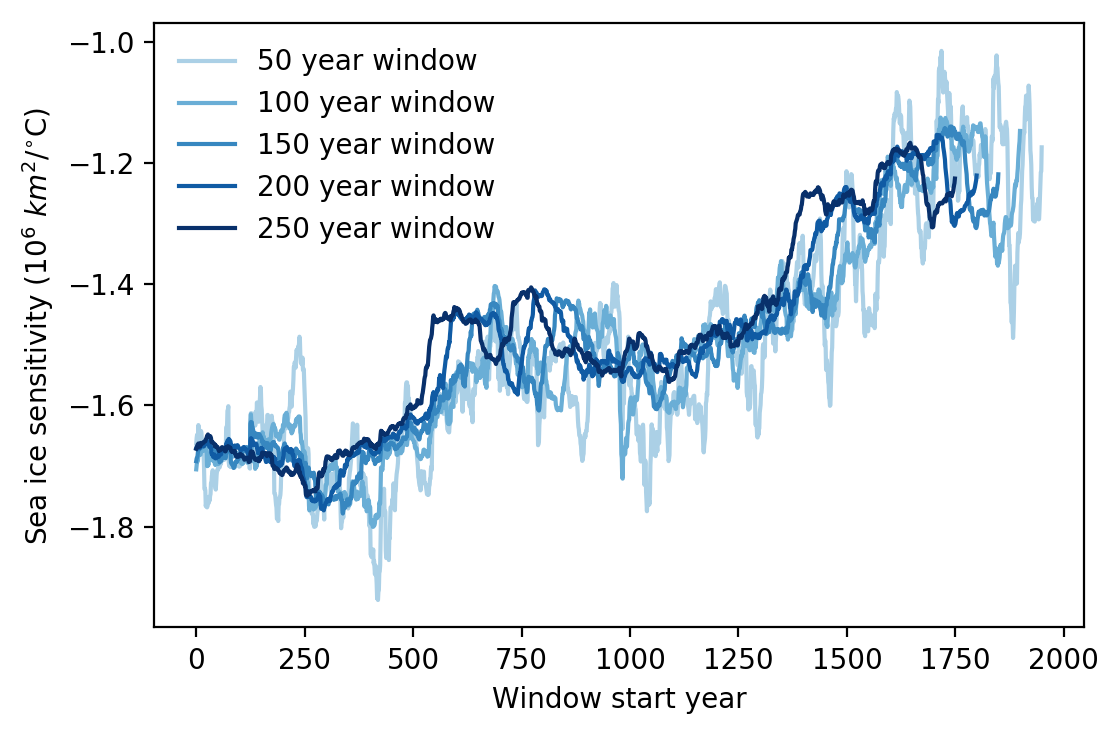

In [328]:
colors = plt.cm.Blues(np.linspace(0,1,7))

plt.plot(np.array(recon_years)[:-win_list[0]],slope_amtas_sic_mpi[0,:], 
         label=str(win_list[0])+' year window', color=colors[2])
plt.plot(np.array(recon_years)[:-win_list[1]],slope_amtas_sic_mpi[1,:-(win_list[1]-win_list[0])], 
         label=str(win_list[1])+' year window', color=colors[3])
plt.plot(np.array(recon_years)[:-win_list[2]],slope_amtas_sic_mpi[2,:-(win_list[2]-win_list[0])], 
         label=str(win_list[2])+' year window', color=colors[4])
plt.plot(np.array(recon_years)[:-win_list[3]],slope_amtas_sic_mpi[3,:-(win_list[3]-win_list[0])], 
         label=str(win_list[3])+' year window', color=colors[5])
plt.plot(np.array(recon_years)[:-win_list[4]],slope_amtas_sic_mpi[4,:-(win_list[4]-win_list[0])], 
         label=str(win_list[4])+' year window', color=colors[6])
# plt.plot(np.array(recon_years)[:-win_list[5]],slope_amtas_sic_mpi[5,:-(win_list[5]-win_list[0])], 
#          label=str(win_list[5]))
# plt.plot(np.array(recon_years)[:-win_list[6]],slope_amtas_sic_mpi[6,:-(win_list[6]-win_list[0])], 
#          label=str(win_list[6]))
# plt.plot(np.array(recon_years)[:-win_list[7]],slope_amtas_sic_mpi[7,:-(win_list[7]-win_list[0])], 
#          label=str(win_list[7]))
# plt.plot(np.array(recon_years)[:-win_list[8]],slope_amtas_sic_mpi[8,:-(win_list[8]-win_list[0])], 
#          label=str(win_list[8]))


plt.legend(frameon=False)

plt.ylabel('Sea ice sensitivity (10$^{6}$ $km^2$/$^{\circ}$C)')
plt.xlabel('Window start year')


In [ ]:
win_list = np.arange(50,501,20)
corr_amtas_sic_mpi_100 = np.zeros((win_list.shape[0],2000-win_list.min()))
slope_amtas_sic_mpi = np.zeros((win_list.shape[0],2000-win_list.min()))

for j,win in enumerate(win_list):
    print(win)
    for i in range(2000-win):
        [_,corr_amtas_sic_mpi_100[j,i],_,_] = rrutils.find_ce_corr(amtas_ensmn_mpi[i:i+win], 
                                                                   sie_ensmn_anom_allit_mpi[i:i+win],
                                                                   np.array(recon_years)[i:i+win],
                                                                   np.array(recon_years)[i:i+win],i,i+win)

Text(0.5,0,'Year (CE)')

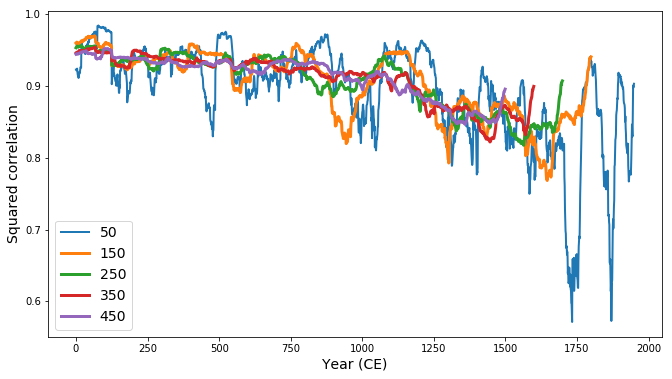

In [115]:
fig, ax_tas = plt.subplots(1, figsize=(11,6))

plt.plot(corr_amtas_sic_mpi_100[0,:]**2, label=str(win_list[0]), linewidth=2)
plt.plot(corr_amtas_sic_mpi_100[10,:-win_list[10]]**2, label=str(win_list[10]), linewidth=3)
plt.plot(corr_amtas_sic_mpi_100[20,:-win_list[20]]**2, label=str(win_list[20]), linewidth=3)
plt.plot(corr_amtas_sic_mpi_100[30,:-win_list[30]]**2, label=str(win_list[30]), linewidth=3)
plt.plot(corr_amtas_sic_mpi_100[40,:-win_list[40]]**2, label=str(win_list[40]), linewidth=3)

plt.legend(fontsize=14)
plt.ylabel('Squared correlation', fontsize=14)
plt.xlabel('Year (CE)', fontsize=14)

NameError: name 'tas_ccsm4_filt20' is not defined

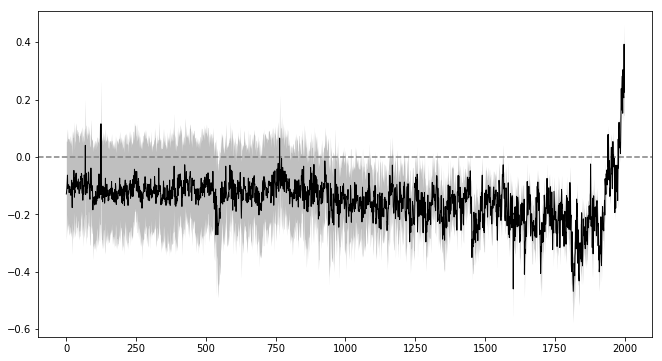

In [27]:
fig, ax_recon = plt.subplots(1, figsize=(11,6))

ax_recon.axhline(0,linestyle='--',color='grey')

ax_recon.fill_between(recon_years,gmtas_ccsm4_2_5,gmtas_ccsm4_97_5,
                      color='gray',lw=0.01,alpha=0.5)
ax_recon.plot(recon_years,gmtas_ensmn_ccsm4,color='k',
         label='Reconstruction - CCSM4, Pages2kv2',linewidth=1)
ax_recon.plot(recon_years,tas_ccsm4_filt20,color='royalblue',
         label='20-year lowpass filtered',linewidth=2)
# ax_recon.plot(fet_time,fet_sie_anom,label='Satellite (Fetterer et al. 2017)', 
#               color='r',linewidth=1)

ax_recon.set_ylabel('Global mean 2m air temperature ($^{\circ}$C)',fontsize=14)
ax_recon.legend(fontsize=13,bbox_to_anchor=(0.55,0.25),frameon=False)

ax_recon.set_xlim(0,2020)
ax_recon.set_ylim(-1,0.3)

ax_recon.spines['top'].set_visible(False)
ax_recon.spines['right'].set_visible(False)

ax_recon.yaxis.set_minor_locator(MultipleLocator(0.25))
ax_recon.xaxis.set_minor_locator(MultipleLocator(125))

plt.subplots_adjust(wspace=0, hspace=0.05)

savedir = ('/home/disk/p/mkb22/Documents/si_analysis_kb/common_era_experiments/'+
           'analysis/figures/Brennan_Hakim_2020/')
savename = 'tot_sie_ccsm4_v_sat_nobs_10it_0_2017.png'
#plt.savefig(savedir+savename)

In [119]:
amtas_ensmn_mpi_anom_61_90 = amtas_ensmn_mpi - np.nanmean(amtas_mpi_filt20[1961:1990])

In [99]:
np.array(recon_years)[1961:1991]

array([1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990])

In [124]:
np.mean(amtas_ensmn_mpi_anom_61_90[1961:1990])

9.570888143320315e-19

## Count number of gridcells that were cutoff: 

In [21]:
nlat = (ccsm4_truth_lat[:,0]>50).sum()
nlon = ccsm4_truth_lat.shape[1]
nens=200

In [22]:
# Count total number of cells: 
ngcells = (nlon*nlat-land_cells_50N)*nens*gmtas_ensmn_ccsm4.shape[0]
ngcells

824000000.0

In [23]:
xlabels_pos = ['MPI \nprior', 'CCSM4 \nprior']
xlabels_neg = ['MPI \nprior', 'CCSM4 \nprior']

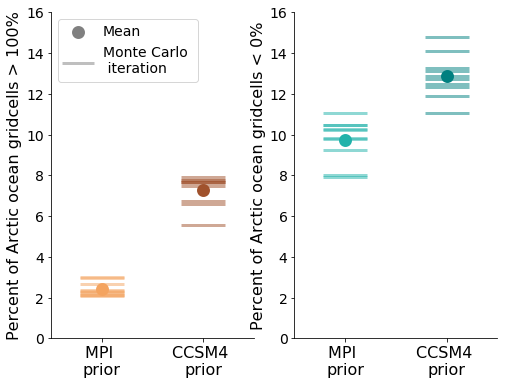

In [25]:
fig, ax = plt.subplots(1,2,figsize=(8,6))
ax_pos = ax[0]
ax_neg = ax[1]

ax_pos.spines['top'].set_visible(False)
ax_pos.spines['right'].set_visible(False)
ax_neg.spines['top'].set_visible(False)
ax_neg.spines['right'].set_visible(False)

ax_neg.scatter(np.ones(10),(cutoff_count_neg_mpi_allit/ngcells)*100, color='lightseagreen',
                marker='_',s=2000, linewidth=3,alpha=0.5)
ax_neg.scatter(np.ones(10)*2,(cutoff_count_neg_allit/ngcells)*100,color='teal',
                marker='_',s=2000, linewidth=3,alpha=0.5)

ax_pos.scatter(np.ones(10)*1,(cutoff_count_pos_mpi_allit/ngcells)*100, 
                color='sandybrown',marker='_',s=2000, linewidth=3,alpha=0.5)
ax_pos.scatter(np.ones(10)*2,(cutoff_count_pos_allit/ngcells)*100,
                color='sienna',marker='_',s=2000, linewidth=3,alpha=0.5)

ax_pos.scatter(1,np.mean(cutoff_count_pos_mpi_allit/ngcells)*100, 
            color='sandybrown', LINEWIDTH=4,s=80)
ax_pos.scatter(2, np.mean(cutoff_count_pos_allit/ngcells)*100, 
            color='sienna',LINEWIDTH=4,s=80)

ax_neg.scatter(1,np.mean(cutoff_count_neg_mpi_allit/ngcells)*100, 
            color='lightseagreen', LINEWIDTH=4,s=80)
ax_neg.scatter(2, np.mean(cutoff_count_neg_allit/ngcells)*100, 
            color='teal',LINEWIDTH=4,s=80)

ax_pos.scatter(-1,1, color='gray',LINEWIDTH=4,s=80, label='Mean')
ax_pos.scatter(-1,1, label='Monte Carlo \n iteration',
               color='gray',marker='_',s=1000, linewidth=3,alpha=0.5)

ax_pos.xaxis.set_major_locator(MultipleLocator(1))
ax_neg.xaxis.set_major_locator(MultipleLocator(1))

ax_pos.set_xticks([1,2])
ax_pos.set_xticklabels(xlabels_pos, fontsize=16)
ax_pos.set_yticklabels(np.arange(0,17,2),fontsize=14)

ax_neg.set_xticks([1,2])
ax_neg.set_xticklabels(xlabels_neg,fontsize=16)
ax_neg.set_yticklabels(np.arange(0,17,2),fontsize=14)

ax_pos.set_ylabel('Percent of Arctic ocean gridcells > 100%', fontsize=16)
ax_neg.set_ylabel('Percent of Arctic ocean gridcells < 0%', fontsize=16)

ax_pos.set_ylim(0,16)
ax_pos.set_xlim(0.5,2.5)

ax_neg.set_ylim(0,16)
ax_neg.set_xlim(0.5,2.5)

ax_pos.legend(fontsize=14,loc='upper left')#bbox_to_anchor=(2,0.25))#,frameon=False)

## Determine Land Mask: 

In [19]:
lat_50N_ind = np.where(ccsm4_truth_lat[:,0]>50)
land_mask = np.zeros((91,180))

for la in lat_50N_ind[0]:
    for lo in range(180):
        if np.allclose(ccsm4_truth_sic[:,la,lo],0):
            land_mask[la,lo] = 1.0
            
land_cells_50N = land_mask.sum()
land_cells_50N, np.where(ccsm4_truth_lat[:,0]>50)[0].shape[0]*180

(1540.0, 3600)

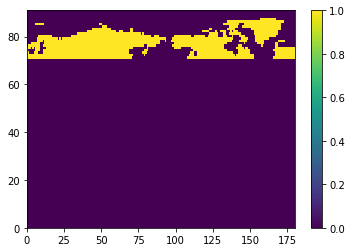

In [20]:
plt.pcolormesh(land_mask)
plt.colorbar()

# NH Comparison: 

In [149]:
an_start = 1961
an_end = 1980

In [117]:
comp_dir = '/home/disk/chaos/mkb22/Documents/SeaIceData/temp_recons/'
Hergel_file = 'Hergel_etal_2007_NH.csv'
Wahl_file = 'Wahl_Ammann_2007_NHx.csv'
MannJones_file = 'Mann_Jones_2003_NH.csv'
Moberg_file = 'Moberg_etal_2005_NH.csv'
Mann_file = 'Mann_etal_1999_NH.csv'


In [130]:
#df_hergel = pd.read_csv(comp_dir+Hergel_file,delimiter ='\s+', skiprows=120)
df_wahl = pd.read_csv(comp_dir+Wahl_file,delimiter ='\s+', skiprows=92)
df_mann03 = pd.read_csv(comp_dir+MannJones_file,delimiter ='\s+', skiprows=3)
df_mann99 = pd.read_csv(comp_dir+Mann_file,delimiter ='\s+', skiprows=3)
df_moberg = pd.read_csv(comp_dir+Moberg_file,delimiter ='\s+', skiprows=3)

df_wahl['Tanom'].values

Year  Value
0     1 -0.393
1     2 -0.310
2     3 -0.243
3     4 -0.244
4     5 -0.308

In [162]:
ind = np.where((df_wahl['Year'].values>=an_start)&(df_wahl['Year'].values<=an_end))
wahl_anom = df_wahl['Tanom'].values - np.nanmean(df_wahl['Tanom'].values[ind])
print(df_wahl['Year'].values[ind])

ind = np.where((df_mann03['Year'].values>=an_start)&(df_mann03['Year'].values<=an_end))
mann03_anom = df_mann03['Value'].values - np.nanmean(df_mann03['Value'].values[ind])

ind = np.where((df_mann99['Year'].values>=an_start)&(df_mann99['Year'].values<=an_end))
mann99_anom = df_mann99['Value'].values - np.nanmean(df_mann99['Value'].values[ind])

ind = np.where((df_moberg['Year'].values>=an_start)&(df_moberg['Year'].values<=an_end))
moberg_anom = df_moberg['Value'].values - np.nanmean(df_moberg['Value'].values[ind])

[1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974
 1975 1976 1977 1978 1979 1980]


In [163]:
ind = np.where((df_wahl['Year'].values>=an_start)&(df_wahl['Year'].values<=an_end))
df_wahl['Year'].values[ind]

array([1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980])

In [164]:
wahl07_filt20 = signal.filtfilt(b2,a2,wahl_anom)
mann03_filt20 = signal.filtfilt(b2,a2,mann03_anom)
mann99_filt20 = signal.filtfilt(b2,a2,mann99_anom)
moberg05_filt20 = signal.filtfilt(b2,a2,moberg_anom)

/home/disk/chaos/mkb22/anaconda2/envs/lmr_py3_xarray/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


In [165]:
an_start = 1961
an_end = 1980

nhmtas_ensmn_ccsm4_filt20_61_90 = nhmtas_ccsm4_filt20 - np.nanmean(nhmtas_ccsm4_filt20[an_start:an_end])
nhmtas_ensmn_ccsm4_filt20_low_61_90 = nhmtas_ccsm4_low_filt20 - np.nanmean(nhmtas_ccsm4_filt20[an_start:an_end])
nhmtas_ensmn_ccsm4_filt20_high_61_90 = nhmtas_ccsm4_high_filt20 - np.nanmean(nhmtas_ccsm4_filt20[an_start:an_end])

nhmtas_ensmn_mpi_filt20_61_90 = nhmtas_mpi_filt20 - np.nanmean(nhmtas_mpi_filt20[an_start:an_end])
nhmtas_ensmn_mpi_filt20_low_61_90 = nhmtas_mpi_low_filt20 - np.nanmean(nhmtas_mpi_filt20[an_start:an_end])
nhmtas_ensmn_mpi_filt20_high_61_90 = nhmtas_mpi_high_filt20 - np.nanmean(nhmtas_mpi_filt20[an_start:an_end])

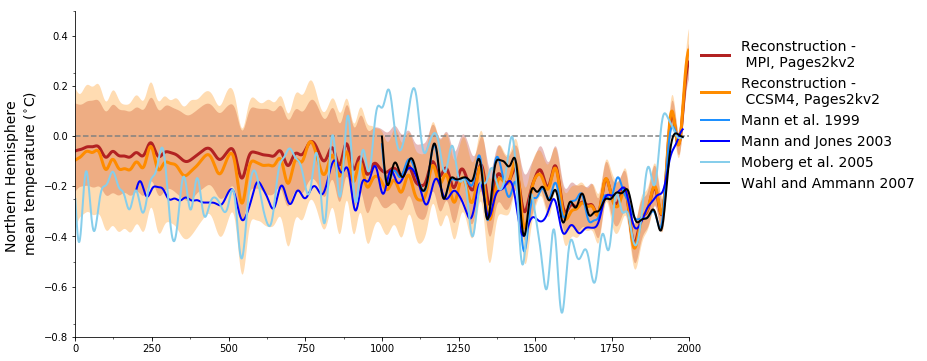

In [181]:
fig, ax_recon = plt.subplots(1, figsize=(11,6))

ax_recon.axhline(0,linestyle='--',color='grey')

ax_recon.fill_between(recon_years,nhmtas_ensmn_mpi_filt20_low_61_90,nhmtas_ensmn_mpi_filt20_high_61_90,
                       color='firebrick',lw=0.01,alpha=0.3)
ax_recon.fill_between(recon_years,nhmtas_ensmn_ccsm4_filt20_low_61_90,nhmtas_ensmn_ccsm4_filt20_high_61_90,
                       color='darkorange',lw=0.01,alpha=0.3)

ax_recon.plot(recon_years,nhmtas_ensmn_mpi_filt20_61_90,color='firebrick',
         label='Reconstruction - \n MPI, Pages2kv2',linewidth=3)
ax_recon.plot(recon_years,nhmtas_ensmn_ccsm4_filt20_61_90,color='darkorange',
         label='Reconstruction - \n CCSM4, Pages2kv2',linewidth=3)

ax_recon.plot(df_mann99['Year'].values,mann99_filt20,color='dodgerblue',
         label='Mann et al. 1999',linewidth=2)
ax_recon.plot(df_mann03['Year'].values,mann03_filt20,color='b',
         label='Mann and Jones 2003',linewidth=2)
ax_recon.plot(df_moberg['Year'].values,moberg05_filt20,color='skyblue',
         label='Moberg et al. 2005',linewidth=2)
ax_recon.plot(df_wahl['Year'].values,wahl07_filt20,color='black',
         label='Wahl and Ammann 2007',linewidth=2)

ax_recon.set_ylabel('Northern Hemisphere \nmean temperature ($^{\circ}$C)',fontsize=14)
ax_recon.legend(fontsize=14,bbox_to_anchor=(1,0.95),frameon=False)

ax_recon.set_xlim(0,2000)
ax_recon.set_ylim(-0.8,0.5)

ax_recon.spines['top'].set_visible(False)
ax_recon.spines['right'].set_visible(False)

ax_recon.yaxis.set_minor_locator(MultipleLocator(0.25))
ax_recon.xaxis.set_minor_locator(MultipleLocator(125))

plt.subplots_adjust(wspace=0, hspace=0.05)

savedir = ('/home/disk/p/mkb22/Documents/si_analysis_kb/common_era_experiments/'+
           'analysis/figures/Brennan_Hakim_2020/')
savename = 'tot_sie_mpi_v_sat_nobs_10it_0_2017.png'
#plt.savefig(savedir+savename)